<font size = "+4" color = '#FF0000'><b> Problem Statement<b/></font>
    
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 
    
<font size = "+4" color = '#FF0000'><b>Attribute information<b/></font>
    
## Dataset for clustering <font size = "+2" color = '#FF0000'><b>Zomato Restaurant names and Metadata<b/></font>

1. Name : Name of Restaurants
   
2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings
    
## Dataset for Sentimental_analysis <font size = "+2" color = '#FF0000'><b>Zomato Restaurant reviews<b/></font>(Perform merge with 1st dataset)

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

    
    
    
    
    
    
    

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [337]:
import os

In [338]:
%cd

C:\Users\Sunny.Kumar


In [339]:
os.chdir('C:\\Users\\Sunny.Kumar\\Desktop\\Unsupervised_Capstone\\Zomato_Restaurant_Clustering&Sentimental_Analysis')

In [340]:
df1=pd.read_csv('Zomato Restaurant reviews.csv') # 2nd data file for checking the sentiments of reviewer(requred merging with 1st file)

In [341]:
df2 = pd.read_csv('Zomato Restaurant names and Metadata.csv') # data for performing clustering

# Let's start <font size = "+4" color = 'Red'><b>Exploratory Data Analysis<b/></font>

In [342]:
df1 # lets see operation for data1 if successful

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [343]:
df2 # let's see if operation is successful

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [344]:
df1.columns # understnd columns in the reviewer data

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [345]:
df2.columns # let's understand columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [309]:
df2.shape # let's see how much columns and rows perticvular data have

(105, 6)

In [346]:
df1.shape # let's understand the columns and rows in perticular data have

(10000, 7)

In [311]:
df2.dtypes # let's know about datatypes in out dtata

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [312]:
df1.dtypes # let's know about datatypes in out dtata

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [313]:
df2.head(5) # checking data and limiting to top 5 rows

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [314]:
df1.head(5) # checking data and limiting to top 5 rows

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [315]:
df2.tail(5) # checking data and limiting to bottom 5 rows

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [316]:
df1.tail(5) # checking data and limiting to bottom 5 rows

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

In [317]:
df2.nunique() # return number of unique elements in the data by default NAN are not counted

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [318]:
df1.nunique() ## return number of unique elements in the data by default NAN are not counted

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [347]:
df2.describe(include='object') # To check the summary statistics of only the categorical features

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [320]:
df1.describe(include='object') # To check the summary statistics of only the categorical features

Restaurant     Reviewer Review Rating  Metadata             Time
count             10000         9962   9955   9962      9962             9962
unique              100         7446   9364     10      2477             9782
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34
freq                100           13    237   3832       919                3

In [348]:
df2.select_dtypes(include= 'object') # selecting  only catagorical data's datatype

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [322]:
df2.nunique() > 10 # let's see unique items which are more than 10

Name           True
Links          True
Cost           True
Collections    True
Cuisines       True
Timings        True
dtype: bool

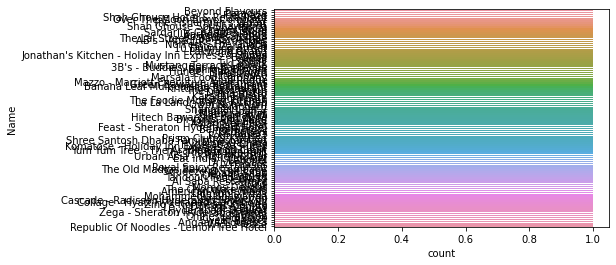

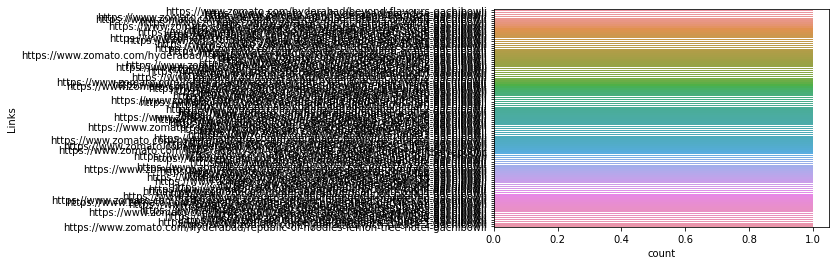

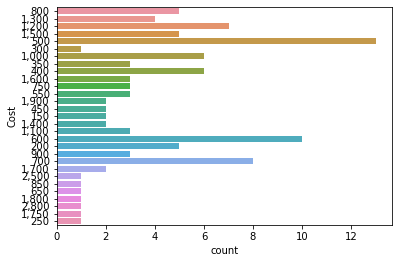

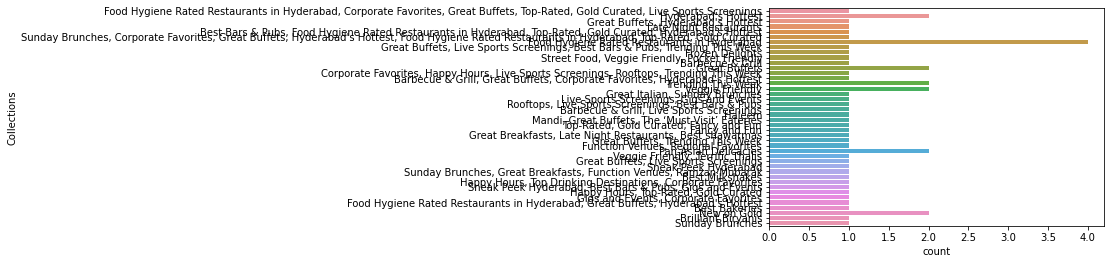

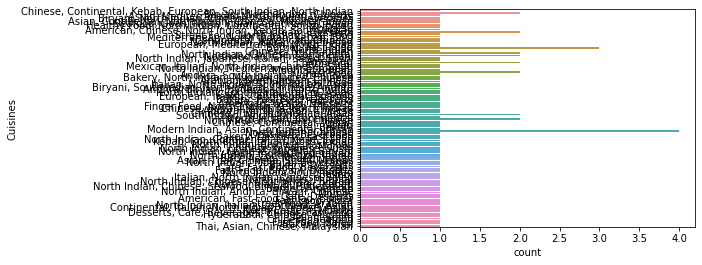

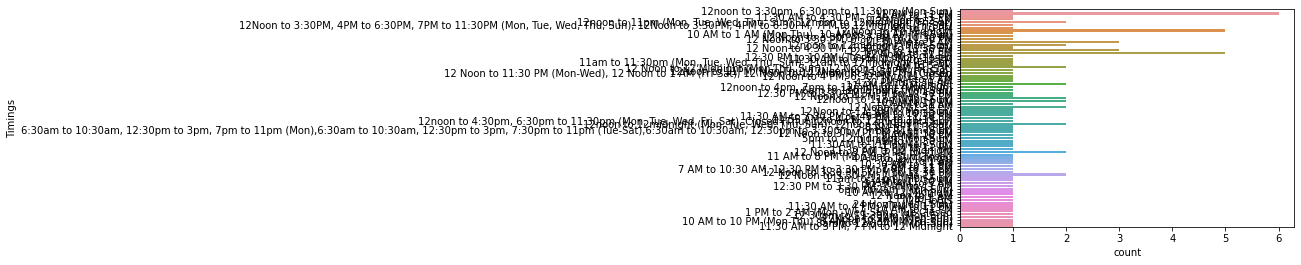

In [335]:
for column in df2.select_dtypes(include='object'): # running for loop to plot the unique in the data
    if df2[column].nunique() > 10:
        sns.countplot(y=column, data=df2)
        plt.show()

In [349]:
df1.select_dtypes(include= 'object') # selecting  only catagorical data's datatype

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  
0           1 Review , 2 Followers  5/25/2019 15:54  
1          3 Reviews , 2 Followers  5/25/2019 14:20  
2          2 Reviews , 3 Followers  5/24/2019 22:54  
3            1 Review , 1 Follower  5/24/2019 22:11  
4          3 Reviews , 2 Followers  5/24/2019 21:37  
...                            ...              ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08  
9996      2 Reviews , 53 Followers   6/4/2016 22:01  
9997    65 Reviews , 423 Followers   6/3/2016 10:37  
9998    13 Reviews , 144 Followers  5/31/2016 17:22  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41  

[10000 rows x 6 columns]

In [350]:
df1.nunique() > 10 # let's see unique items which are more than 10 classes

Restaurant     True
Reviewer       True
Review         True
Rating        False
Metadata       True
Time           True
Pictures       True
dtype: bool

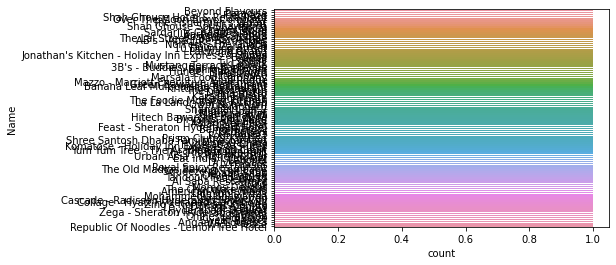

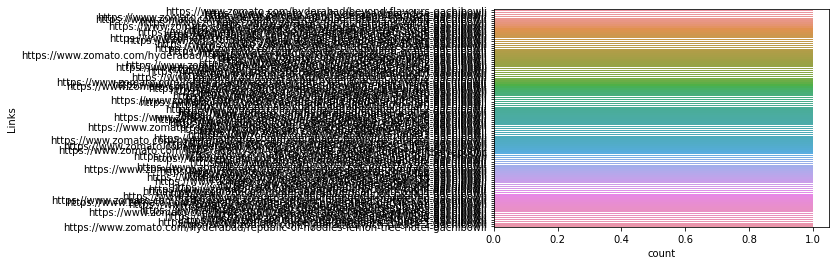

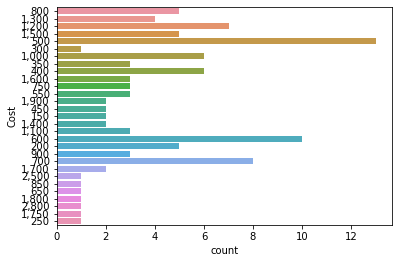

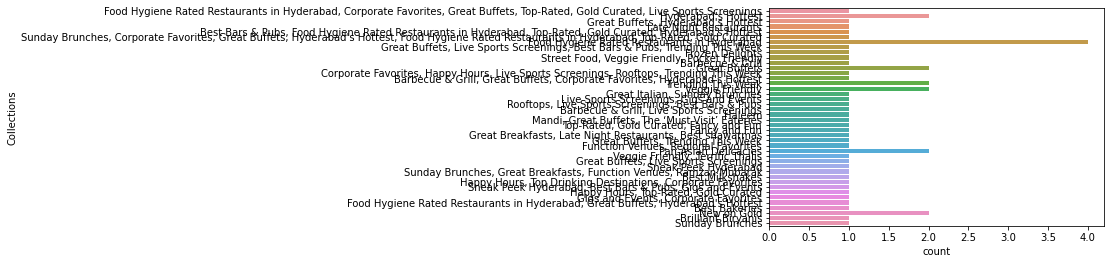

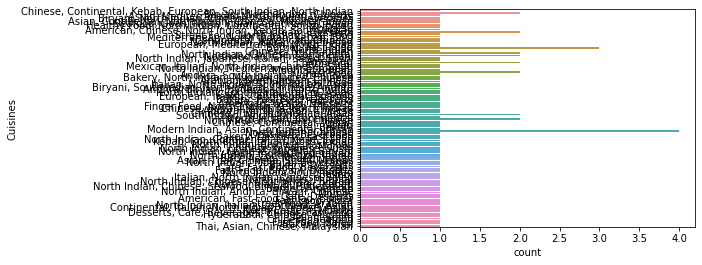

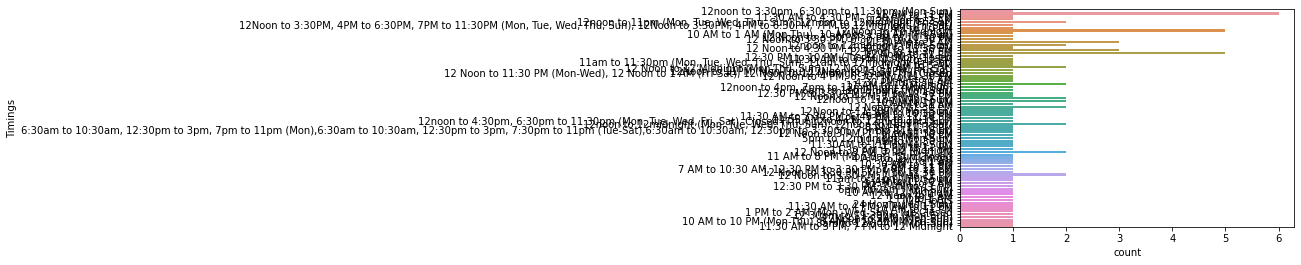

In [351]:
for column in df2.select_dtypes(include='object'): # running for loop to plot the unique in the df2 which is greater than 10
    if df2[column].nunique() > 10:
        sns.countplot(y=column, data=df2)
        plt.show()

In [352]:
for column in df2.select_dtypes(include='object'): # applying for loop and looking for mean of unique exceeding 10 classes
    if df2[column].nunique() > 10: 
        display(df2.groupby(column).mean()) # used display which gives better results than print


Empty DataFrame
Columns: []
Index: [10 Downing Street, 13 Dhaba, 3B's - Buddies, Bar & Barbecue, AB's - Absolute Barbecues, Absolute Sizzlers, Al Saba Restaurant, American Wild Wings, Amul, Angaara Counts 3, Arena Eleven, Aromas@11SIX, Asian Meal Box, B-Dubs, Banana Leaf Multicuisine Restaurant, Barbeque Nation, Behrouz Biryani, Being Hungry, Beyond Flavours, Biryanis And More, Cafe Eclat, Cascade - Radisson Hyderabad Hitec City, Chinese Pavilion, Club Rogue, Collage - Hyatt Hyderabad Gachibowli, Cream Stone, Delhi-39, Deli 9 Bistro, Desi Bytes, Dine O China, Diners Pavilion, Domino's Pizza, Driven Cafe, Dunkin' Donuts, Eat India Company, Faasos, Feast - Sheraton Hyderabad Hotel, Flechazo, Frio Bistro, GD's, Gal Punjab Di, Green Bawarchi Restaurant, Hitech Bawarchi Food Zone, Hotel Zara Hi-Fi, Hunger Maggi Point, Hyderabad Chefs, Hyderabadi Daawat, Hyper Local, IndiBlaze, Jonathan's Kitchen - Holiday Inn Express & Suites, KFC, KS Bakers, Karachi Bakery, Karachi Cafe, Khaan Saab, Komatose - Holiday Inn Express & Suites, Kritunga Restaurant, La La Land - Bar & Kitchen, Labonel, Marsala Food Company, Mathura Vilas, Mazzo - Marriott Executive Apartments, Mohammedia Shawarma, Momos Delight, Mustang Terrace Lounge, NorFest - The Dhaba, Olive Garden, Over The Moon Brew Company, Owm Nom Nom, Pakwaan Grand, Paradise, Pista House, Pot Pourri, PourHouse7, Prism Club & Kitchen, Republic Of Noodles - Lemon Tree Hotel, Royal Spicy Restaurant, SKYHY, Sardarji's Chaats & More, Shah Ghouse Hotel & Restaurant, Shah Ghouse Spl Shawarma, Shanghai Chef 2, Shree Santosh Dhaba Family Restaurant, Squeeze @ The Lime, Sweet Basket, T Grill, Tandoori Food Works, Tempteys, The Chocolate Room, The Fisherman's Wharf, The Foodie Monster Kitchen, The Glass Onion, The Indi Grill, The Lal Street - Bar Exchange, The Old Madras Baking Company, The Tilt Bar Republic, Tiki Shack, Triptify, Udipi's Upahar, Ulavacharu, Urban Asia - Kitchen & Bar, ...]

[105 rows x 0 columns]

Empty DataFrame
Columns: []
Index: [https://www.zomato.com/hyderabad/10-downing-street-gachibowli, https://www.zomato.com/hyderabad/13-dhaba-gachibowli, https://www.zomato.com/hyderabad/3bs-buddies-bar-barbecue-gachibowli, https://www.zomato.com/hyderabad/abs-absolute-barbecues-gachibowli, https://www.zomato.com/hyderabad/absolute-sizzlers-gachibowli, https://www.zomato.com/hyderabad/al-saba-restaurant-gachibowli, https://www.zomato.com/hyderabad/american-wild-wings-gachibowli, https://www.zomato.com/hyderabad/amul-gachibowli, https://www.zomato.com/hyderabad/angaara-counts-3-gachibowli, https://www.zomato.com/hyderabad/arena-eleven-gachibowli, https://www.zomato.com/hyderabad/aromas11six-gachibowli, https://www.zomato.com/hyderabad/asian-meal-box-gachibowli, https://www.zomato.com/hyderabad/b-dubs-gachibowli, https://www.zomato.com/hyderabad/banana-leaf-multicuisine-restaurant-gachibowli, https://www.zomato.com/hyderabad/barbeque-nation-gachibowli, https://www.zomato.com/hyderabad/behrouz-biryani-gachibowli, https://www.zomato.com/hyderabad/being-hungry-gachibowli, https://www.zomato.com/hyderabad/beyond-flavours-gachibowli, https://www.zomato.com/hyderabad/biryanis-and-more-gachibowli, https://www.zomato.com/hyderabad/cafe-eclat-gachibowli, https://www.zomato.com/hyderabad/cascade-radisson-hyderabad-hitec-city-gachibowli, https://www.zomato.com/hyderabad/chinese-pavilion-gachibowli, https://www.zomato.com/hyderabad/club-rogue-gachibowli, https://www.zomato.com/hyderabad/collage-hyatt-hyderabad-gachibowli-gachibowli, https://www.zomato.com/hyderabad/cream-stone-gachibowli, https://www.zomato.com/hyderabad/delhi-39-gachibowli, https://www.zomato.com/hyderabad/deli-9-bistro-gachibowli, https://www.zomato.com/hyderabad/desi-bytes-gachibowli, https://www.zomato.com/hyderabad/dine-o-china-gachibowli, https://www.zomato.com/hyderabad/diners-pavilion-gachibowli, https://www.zomato.com/hyderabad/dominos-pizza-4-gachibowli, https://www.zomato.com/hyderabad/driven-cafe-gachibowli, https://www.zomato.com/hyderabad/dunkin-donuts-gachibowli, https://www.zomato.com/hyderabad/eat-fit-gachibowli, https://www.zomato.com/hyderabad/eat-india-company-gachibowli, https://www.zomato.com/hyderabad/faasos-gachibowli, https://www.zomato.com/hyderabad/feast-sheraton-hyderabad-hotel-gachibowli, https://www.zomato.com/hyderabad/flechazo-gachibowli, https://www.zomato.com/hyderabad/frio-bistro-gachibowli, https://www.zomato.com/hyderabad/gal-punjab-di-gachibowli, https://www.zomato.com/hyderabad/gds-gachibowli, https://www.zomato.com/hyderabad/green-bawarchi-restaurant-gachibowli, https://www.zomato.com/hyderabad/hitech-bawarchi-food-zone-gachibowli, https://www.zomato.com/hyderabad/hotel-zara-gachibowli, https://www.zomato.com/hyderabad/hunger-maggi-point-gachibowli, https://www.zomato.com/hyderabad/hyderabad-chefs-gachibowli, https://www.zomato.com/hyderabad/hyderabadi-daawat-1-gachibowli, https://www.zomato.com/hyderabad/hyper-local-gachibowli, https://www.zomato.com/hyderabad/indiblaze-gachibowli, https://www.zomato.com/hyderabad/jonathans-kitchen-holiday-inn-express-suites-gachibowli, https://www.zomato.com/hyderabad/karachi-bakery-gachibowli, https://www.zomato.com/hyderabad/karachi-cafe-gachibowli, https://www.zomato.com/hyderabad/kfc-gachibowli, https://www.zomato.com/hyderabad/khaan-saab-gachibowli, https://www.zomato.com/hyderabad/komatose-holiday-inn-express-suites-gachibowli, https://www.zomato.com/hyderabad/kritunga-restaurant-gachibowli, https://www.zomato.com/hyderabad/ks-bakers-gachibowli, https://www.zomato.com/hyderabad/la-la-land-bar-kitchen-gachibowli, https://www.zomato.com/hyderabad/labonel-gachibowli, https://www.zomato.com/hyderabad/marsala-food-company-gachibowli, https://www.zomato.com/hyderabad/mathura-vilas-gachibowli, https://www.zomato.com/hyderabad/mazzo-marriott-executive-apartments-gachibowli, https://www.zomato.com/hyderabad/mohammedia-shawarma-gachibowli, https://www.zomato.com/hyderabad/momos-delight-gachibowli, https:

Empty DataFrame
Columns: []
Index: [1,000, 1,100, 1,200, 1,300, 1,400, 1,500, 1,600, 1,700, 1,750, 1,800, 1,900, 150, 2,500, 2,800, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]

Empty DataFrame
Columns: []
Index: [Barbecue & Grill, Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest, Barbecue & Grill, Live Sports Screenings, Best Bakeries, Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest, Best Milkshakes, Brilliant Biryanis, Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week, Fancy and Fun, Food Hygiene Rated Restaurants in Hyderabad, Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings, Food Hygiene Rated Restaurants in Hyderabad, Great Buffets, Hyderabad's Hottest, Frozen Delights, Function Venues, Regional Favorites, Gigs and Events, Corporate Favorites, Great Breakfasts, Late Night Restaurants, Best shawarmas, Great Buffets, Great Buffets, Hyderabad's Hottest, Great Buffets, Live Sports Screenings, Great Buffets, Live Sports Screenings, Best Bars & Pubs, Trending This Week, Great Buffets, Trending This Week, Great Italian, Sunday Brunches, Haleem, Happy Hours, Top Drinking Destinations, Corporate Favorites, Happy Hours, Top-Rated, Gold Curated, Hyderabad's Hottest, Late Night Restaurants, Live Sports Screenings, Gigs and Events, Mandi, Great Buffets, The ‘Must Visit’ Eateries, New on Gold, Pan-Asian Delicacies, Rooftops, Live Sports Screenings, Best Bars & Pubs, Sneak Peek Hyderabad, Sneak Peek Hyderabad, Best Bars & Pubs, Gigs and Events, Street Food, Veggie Friendly, Pocket Friendly, Sunday Brunches, Sunday Brunches, Corporate Favorites, Great Buffets, Hyderabad's Hottest, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Sunday Brunches, Great Breakfasts, Function Venues, Ramzan Mubarak, Top-Rated, Gold Curated, Fancy and Fun, Trending This Week, Veggie Friendly, Veggie Friendly, Terrific Thalis]

Empty DataFrame
Columns: []
Index: [American, American, Chinese, North Indian, Kebab, South Indian, American, Fast Food, Salad, Burger, American, Wraps, Desserts, Andhra, Biryani, Hyderabadi, North Indian, Andhra, North Indian, Chinese, Andhra, South Indian, North Indian, Arabian, North Indian, Chinese, Asian, Asian, Continental, North Indian, Chinese, Mediterranean, Asian, Mediterranean, North Indian, Desserts, Asian, Sushi, Asian, Thai, Chinese, Sushi, Momos, BBQ, Asian, Modern Indian, Bakery, Bakery, Desserts, Bakery, Desserts, Fast Food, Bakery, Fast Food, Desserts, Bakery, Mithai, Bakery, North Indian, Mughlai, Juices, Chinese, Biryani, North Indian, Chinese, Biryani, North Indian, Chinese, Seafood, Beverages, Biryani, South Indian, North Indian, Chinese, Andhra, Burger, American, Burger, Fast Food, Cafe, Bakery, Cafe, Continental, Desserts, Cafe, Desserts, Cafe, Desserts, Fast Food, Cafe, Fast Food, Beverages, Chinese, Asian, Momos, Chinese, Biryani, Andhra, North Indian, Chinese, Continental, Italian, Chinese, Continental, Kebab, European, South Indian, North Indian, Chinese, North Indian, Chinese, Seafood, Chinese, Thai, Indonesian, Asian, Continental, Continental, American, Chinese, Continental, Italian, North Indian, Chinese, Asian, Desserts, Beverages, Desserts, Cafe, Beverages, Burger, Fast Food, European, Italian, Continental, Spanish, European, Mediterranean, North Indian, Fast Food, Fast Food, Biryani, Desserts, Fast Food, Pizza, Fast Food, Salad, Finger Food, North Indian, Kebab, Chinese, Healthy Food, North Indian, Continental, South Indian, Hyderabadi, Chinese, Mughlai, Ice Cream, Desserts, Italian, North Indian, Chinese, Salad, Italian, North Indian, South Indian, Asian, Kebab, Continental, Italian, North Indian, Lebanese, Mediterranean, North Indian, Kebab, BBQ, Mexican, Italian, North Indian, Chinese, Salad, Modern Indian, Asian, Continental, Italian, Momos, Mughlai, Biryani, North Eastern, Momos, North Indian, North Indian, Andhra, Biryani, Chinese, North Indian, Biryani, Chinese, North Indian, Burger, Kebab, North Indian, Chinese, North Indian, Chinese, Biryani, North Indian, Chinese, Continental, North Indian, Chinese, Continental, Biryani, North Indian, Chinese, Fast Food, North Indian, Chinese, Japanese, Sushi, North Indian, Chinese, Mughlai, Biryani, North Indian, Chinese, Seafood, Biryani, Hyderabadi, North Indian, Continental, North Indian, Continental, Chinese, Italian, North Indian, Continental, Italian, North Indian, Continental, Italian, Asian, North Indian, Fast Food, North Indian, Hyderabadi, North Indian, Italian, Continental, Asian, North Indian, Italian, Finger Food, North Indian, Japanese, Italian, Salad, Sushi, North Indian, Mediterranean, European, North Indian, Mughlai, North Indian, Mughlai, Beverages, North Indian, South Indian, Seafood, Goan, North Indian, Continental, Asian, South Indian, North Indian, Chinese, Street Food, Arabian, Street Food, North Indian, Fast Food, Thai, Asian, Chinese, Malaysian]

[92 rows x 0 columns]

Empty DataFrame
Columns: []
Index: [1 PM to 1 AM, 1 PM to 11 PM, 1 PM to 2 AM (Mon, Wed-Sun), Tue Closed, 10 AM to 1 AM, 10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun), 10 AM to 10 PM, 10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fri-Sun), 10 AM to 11 PM, 10 AM to 12 Midnight, 10 AM to 5 AM, 10:30 AM to 11 PM, 11 AM to 11 PM, 11 AM to 11:30 PM, 11 AM to 12 Midnight, 11 AM to 8 PM (Mon-Sat), Sun Closed, 11:30 AM to 1 AM, 11:30 AM to 12 Midnight, 11:30 AM to 3 PM, 7 PM to 11 PM, 11:30 AM to 3 PM, 7 PM to 12 Midnight, 11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM, 11:30 AM to 4 PM, 7 PM to 11 PM, 11:30 AM to 4:30 PM, 6:30 PM to 11 PM, 11:30 AM to 5 AM, 11:30AM to 11PM (Mon-Sun), 11:55 AM to 4 PM, 7 PM to 11:15 PM, 11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat), 11am to 11pm (Mon-Sun), 12 Noon to 10:30 PM, 12 Noon to 11 PM, 12 Noon to 11:30 PM, 12 Noon to 11:30 PM (Mon-Wed), 12 Noon to 1 AM (Fri-Sat), 12 Noon to 12 Midnight (Sun), Thu Closed, 12 Noon to 12 Midnight, 12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-Sat), 12 Noon to 2 AM, 12 Noon to 3 PM, 7 PM to 11 PM, 12 Noon to 3 PM, 7 PM to 11:30 PM, 12 Noon to 3:30 PM, 6:30 PM to 11:30 PM, 12 Noon to 3:30 PM, 7 PM to 10:30 PM, 12 Noon to 3:30 PM, 7 PM to 11 PM, 12 Noon to 3:30 PM, 7 PM to 11:30 PM, 12 Noon to 4 AM, 12 Noon to 4 PM, 6:30 PM to 11:30 PM, 12 Noon to 4 PM, 7 PM to 11 PM, 12 Noon to 4:30 PM, 6:30 PM to 11:30 PM, 12:30 PM to 10 PM (Tue-Sun), Mon Closed, 12:30 PM to 3:30 PM, 7 PM to 10:40 PM, 12:30 PM to 3:30 PM, 7 PM to 11 PM, 12:30pm to 11:30pm (Mon-Sun), 12Noon to 11:30PM (Mon-Sun), 12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fri-Sun), 12Noon to 2AM (Mon-Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat), 12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat), 12noon to 11pm (Mon-Sun), 12noon to 12midnight (Mon, Tue, Wed, Thu, Sun), 12noon to 1am (Fri-Sat), 12noon to 12midnight (Mon-Sun), 12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun), 12noon to 4:30pm, 6:30pm to 11:30pm (Mon, Tue, Wed, Fri, Sat), Closed (Thu),12noon to 12midnight (Sun), 12noon to 4pm, 7pm to 12midnight (Mon-Sun), 24 Hours, 24 Hours (Mon-Sun), 4 AM to 12 Midnight, 4:30 PM to 5:30 AM, 5pm to 12midnight (Mon-Sun), 6 AM to 10:30 PM, 6 AM to 11:30 PM, 6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm (Mon),6:30am to 10:30am, 12:30pm to 3pm, 7:30pm to 11pm (Tue-Sat),6:30am to 10:30am, 12:30pm to 3:30pm, 7pm to 11pm (Sun), 6am to 12midnight (Mon-Sun), 6pm to 2am (Mon-Sun), 7 AM to 1 AM, 7 AM to 10 PM, 7 AM to 10:30 AM, 12:30 PM to 3:30 PM, 7 PM to 11 PM, 7 AM to 11 PM, 8 AM to 11:30 PM, 8am to 12:30AM (Mon-Sun), 9 AM to 1 AM, 9 AM to 10 PM]

[77 rows x 0 columns]

In [353]:
df2.isnull()

Name  Links   Cost  Collections  Cuisines  Timings
0    False  False  False        False     False    False
1    False  False  False        False     False    False
2    False  False  False        False     False    False
3    False  False  False        False     False    False
4    False  False  False        False     False    False
..     ...    ...    ...          ...       ...      ...
100  False  False  False         True     False    False
101  False  False  False         True     False    False
102  False  False  False         True     False    False
103  False  False  False         True     False    False
104  False  False  False        False     False    False

[105 rows x 6 columns]

In [354]:
df1.isnull()

Restaurant  Reviewer  Review  Rating  Metadata   Time  Pictures
0          False     False   False   False     False  False     False
1          False     False   False   False     False  False     False
2          False     False   False   False     False  False     False
3          False     False   False   False     False  False     False
4          False     False   False   False     False  False     False
...          ...       ...     ...     ...       ...    ...       ...
9995       False     False   False   False     False  False     False
9996       False     False   False   False     False  False     False
9997       False     False   False   False     False  False     False
9998       False     False   False   False     False  False     False
9999       False     False   False   False     False  False     False

[10000 rows x 7 columns]

In [355]:
df2.isna().sum().sort_values(ascending=True) # checking na in data dataset in ascending order4

Name            0
Links           0
Cost            0
Cuisines        0
Timings         1
Collections    54
dtype: int64

In [356]:
df2.isna().sum()*100/len(df2) # checking na's in the form of percentages

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

In [357]:
df2.isna().sum()*100/len(df2)

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

### Findings say's we have na's in the Timings column and collections in the restrorent names and metadata
### Timings have 0.95% na
### Collections we have 51.42% na

In [358]:
df1.isna().value_counts().sort_values(ascending=True) #checking na in data1 dataset

Restaurant  Reviewer  Review  Rating  Metadata  Time   Pictures
False       False     True    False   False     False  False          7
            True      True    True    True      True   False         38
            False     False   False   False     False  False       9955
dtype: int64

In [359]:
df1.isna().sum()*100/len(df1) # checking na's in the form of percentages

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

## Findings for na 
* Review has 45%
* Rating,Reviewer,Time and Metadata has 38%
* followers having 16%

In [361]:
meta_df = df2.copy()

In [362]:
meta_df.duplicated().sum()

0

In [363]:
reviews_df = df1.copy()

In [364]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [365]:
reviews_df.dropna(inplace= True)

In [366]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

<AxesSubplot:ylabel='count'>

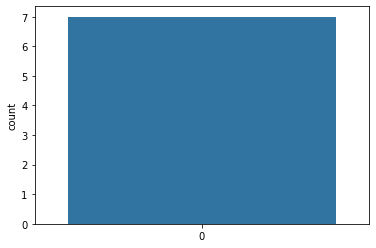

In [367]:
sns.countplot(data=reviews_df.isnull().sum()) # confirming that there is no Na's present

### We can see that we have revomed the na's values from the ratings column

In [368]:
reviews_df['Rating'].unique() # cheking unique values in the Ratings column

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [369]:
reviews_df.Rating.value_counts().sort_values(ascending=False) # eXPLORING THE COLUMNS RATING the nomber of values present in Rating

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

### My finding is that I have Like value which is only 1 so I can remove this and convert Entire Rating column to float

In [370]:
reviews_df=reviews_df[reviews_df['Rating']!='Like'] # telling that My rating column is not equal to like or just remove like from Rating

In [371]:
reviews_df.Rating.value_counts().sort_values(ascending=False) # eXPLORING THE COLUMNS RATING the nomber of values present in Rating

5      3826
4      2373
1      1735
3      1192
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [372]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9954 non-null   object
 1   Reviewer    9954 non-null   object
 2   Review      9954 non-null   object
 3   Rating      9954 non-null   object
 4   Metadata    9954 non-null   object
 5   Time        9954 non-null   object
 6   Pictures    9954 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.1+ KB


### confirmed that I have excluded the Like from Rating, let's convert the data type now to float as we can see that we have almost all the the column which are in the form object datatype and uin order to process data to machine/algoritm we have to convert it to numerical form.

In [379]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')

In [380]:
reviews_df['Rating'].dtypes# Column is succefully converted to float64

dtype('float64')

### Let's follow the transformation on other variables as well in the reviews data

In [381]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures  Reviews  Followers  Year  Hour  
0    2019-05-25 15:54:00         0        1        2.0  2019    15  
1    2019-05-25 14:20:00         0        3        2.0  2019    14  
2    2019-05-24 22:54:00         0        2        3.0  2019    22  
3    2019-05-24 22:11:00         0        1        1.0  2019    22  
4    2019-05-24 21:37:00         0        3        2.0  2019    21  
...                  ...       ...      ...        ...   ...   ...  
9995 2016-06-05 00:08:00         0       53       54.0  2016     0  
9996 2016-06-04 22:01:00         0        2       53.0  2016    22  
9997 2016-06-03 10:37:00         3       65      423.0  2016    10  
9998 2016-05-31 17:22:00         0       13      144.0  2016    17  
9999 2016-05-31 16:41:00         6      472     1302.0  2016    16  

[9954 rows x 10 columns]

In [382]:
reviews_df.head(7)# let's see if our transformation has worked!!!

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   
5  Beyond Flavours         Nagabhavani K   
6  Beyond Flavours       Jamuna Bhuwalka   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   
5  Ambiance is good, service is good, food is aPr...     5.0   
6  Its a very nice place, ambience is different, ...     5.0   

                 Time  Pictures  Reviews  Followers  Year  Hour  
0 2019-05-25 15:54:00         0        1        2.0  2019    15  
1 2019-05-25 14:20:00         0        3        2.0  2019    14  
2 2019-05-24 22:54:00         0        2        3.0  2019    22  
3 2019-05-24 22:11:00         0        1        1.0  2019    22  
4 2019-05-24 21:37:00         0        3        2.0  2019    21  
5 2019-05-24 15:22:00         0        1        NaN  2019    15  
6 2019-05-24 01:02:00         0        1        NaN  2019     1

### Yes it is sucessfull!!

In [377]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
#let's explore the Year

In [378]:
reviews_df.Year.unique()

array([2019, 2018, 2017, 2016], dtype=int64)

* We have 4 unique values of years in Year columns

In [ ]:
#let's check Rating

<AxesSubplot:xlabel='Rating', ylabel='count'>

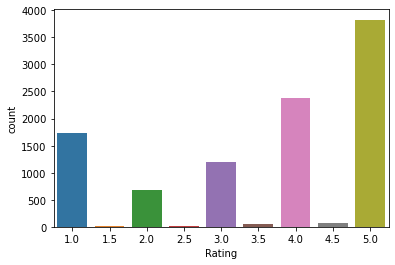

In [383]:
sns.countplot(reviews_df.Rating)# plotting the rating

## Now let's try to plot and groupby restro. and aggregate by rating

In [384]:
reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

Restaurant  Rating
0        AB's - Absolute Barbecues   4.880
1                           B-Dubs   4.810
2   3B's - Buddies, Bar & Barbecue   4.760
3                         Paradise   4.700
4                         Flechazo   4.660
..                             ...     ...
95                 Behrouz Biryani   2.825
96                   Mathura Vilas   2.820
97                   Pakwaan Grand   2.710
98                  Asian Meal Box   2.580
99                Hotel Zara Hi-Fi   2.400

[100 rows x 2 columns]

<AxesSubplot:ylabel='Count'>

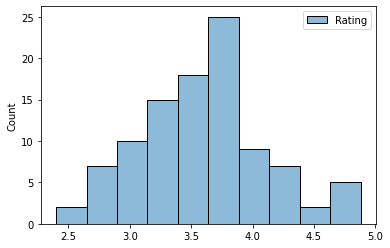

In [385]:
sns.histplot(reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()) #cheking using histogram

Text(0.5, 1.0, 'Top Rated Restaurants')

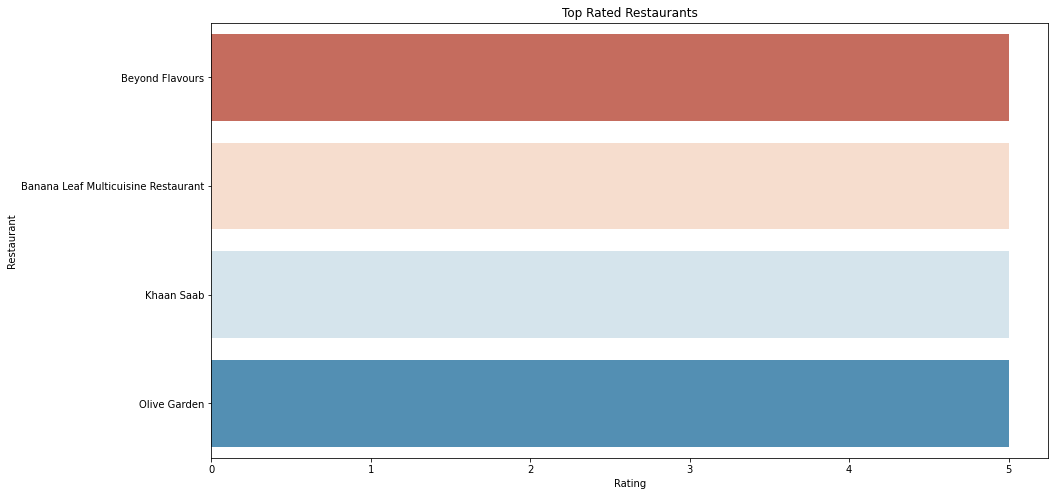

In [386]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
df_rating = reviews_df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(data=df_rating, x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated Restaurants')

## Above are the top 10 rastro. which are popular based on rating

In [387]:
yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

Restaurant  Year    Rating
0                 AB's - Absolute Barbecues  2019  4.880000
1                                    B-Dubs  2019  4.810000
2            3B's - Buddies, Bar & Barbecue  2019  4.760000
3                                  Paradise  2019  4.700000
4                                  Flechazo  2019  4.660000
5   Cascade - Radisson Hyderabad Hitec City  2019  4.641509
7                            The Indi Grill  2019  4.600000
8                            Karachi Bakery  2019  4.538462
10          Zega - Sheraton Hyderabad Hotel  2019  4.409091
12               Over The Moon Brew Company  2019  4.340000

## Above restaurant are top 10 restaurant in 2019 year.

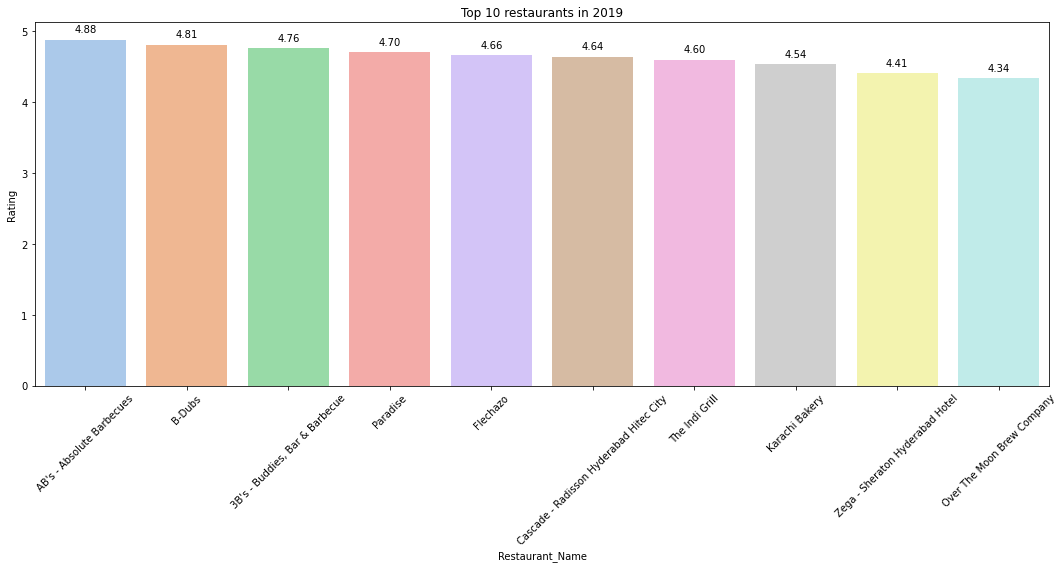

In [388]:
plt.figure(figsize=(15, 8)) # top 10 restaurant rating in the year of 2019
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

## Top rastro. in 2019 with the Rating.

In [389]:
twenty_eighteen = yw_avg_rating[yw_avg_rating.Year == 2018].head(10) # checking 2018 year top restro.
twenty_eighteen

Restaurant  Year    Rating
6          Feast - Sheraton Hyderabad Hotel  2018  4.629630
9           Zega - Sheraton Hyderabad Hotel  2018  4.461538
11    Mazzo - Marriott Executive Apartments  2018  4.375000
14                        Hyderabadi Daawat  2018  4.296296
21  Cascade - Radisson Hyderabad Hitec City  2018  4.211538
23                      NorFest - The Dhaba  2018  4.166667
25                          Barbeque Nation  2018  4.072464
27                           Udipi's Upahar  2018  4.055556
31                      American Wild Wings  2018  4.000000
32                                     Amul  2018  3.988095

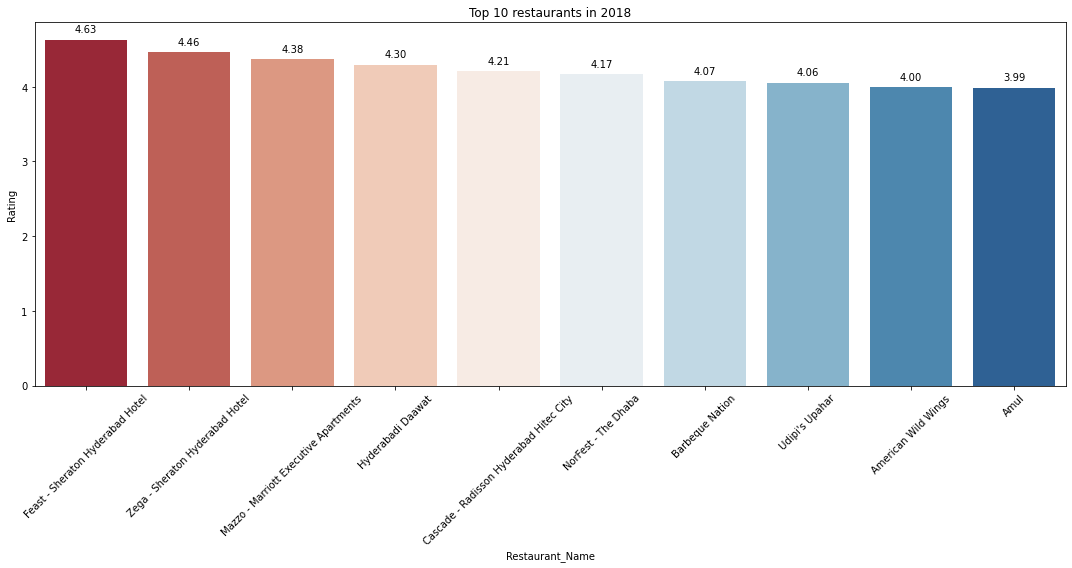

In [390]:
plt.figure(figsize=(15, 8))
plot = sns.barplot(twenty_eighteen.Restaurant, twenty_eighteen.Rating, palette='RdBu')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2018')
plt.tight_layout()

## Top 10 restro. of 2018 with individual rating.

In [391]:
twenty_seventeen = yw_avg_rating[yw_avg_rating.Year == 2017].head(10)
twenty_seventeen

Restaurant  Year    Rating
16                                 KS Bakers  2017  4.254717
41                                   Labonel  2017  3.897436
44                          Chinese Pavilion  2017  3.883333
51      Collage - Hyatt Hyderabad Gachibowli  2017  3.833333
117                           Dunkin' Donuts  2017  3.423077
118                       Al Saba Restaurant  2017  3.388889
120                                  T Grill  2017  3.382353
122  Cascade - Radisson Hyderabad Hitec City  2017  3.357143

#### Top restro of 2018.

In [392]:
twenty_sixteen = yw_avg_rating[yw_avg_rating.Year == 2016].head(10)
twenty_sixteen

Restaurant  Year    Rating
34           Labonel  2016  3.970588
37  Chinese Pavilion  2016  3.961538

#### 2016 had 2 restro with ratings more than 3.9

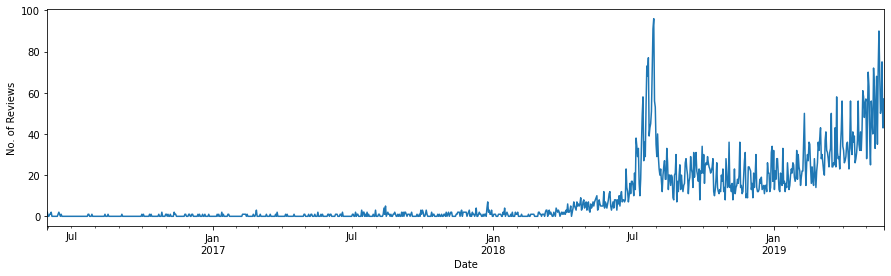

In [393]:
plt.figure(figsize=(15, 4)) # checkingthe trend of reviews with rspect to years
reviews_df.resample('1D',on='Time')['Reviews'].size().plot.line()
plt.xlabel('Date')
plt.ylabel('No. of Reviews')
plt.show()

#### let's find out cousin list

In [394]:
cuisine_list = meta_df.Cuisines.str.split(', ') 
cuis_list = {} 
for names in cuisine_list: 
    for name in names:
        if (name in cuis_list):
            cuis_list[name]+=1
        else:  
            cuis_list[name]=1 
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) 
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) 
top_10_cuis = cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


#### Top 10 cuisins

In [395]:
cuis_df.reset_index(inplace=True)

In [396]:
cuis_df.head(5)

index  Counts of Restaurants
0  North Indian                     61
1       Chinese                     43
2   Continental                     21
3       Biryani                     16
4     Fast Food                     15

Text(0.5, 1.0, 'Most popular cuisines at Restaurants in Hyderabad')

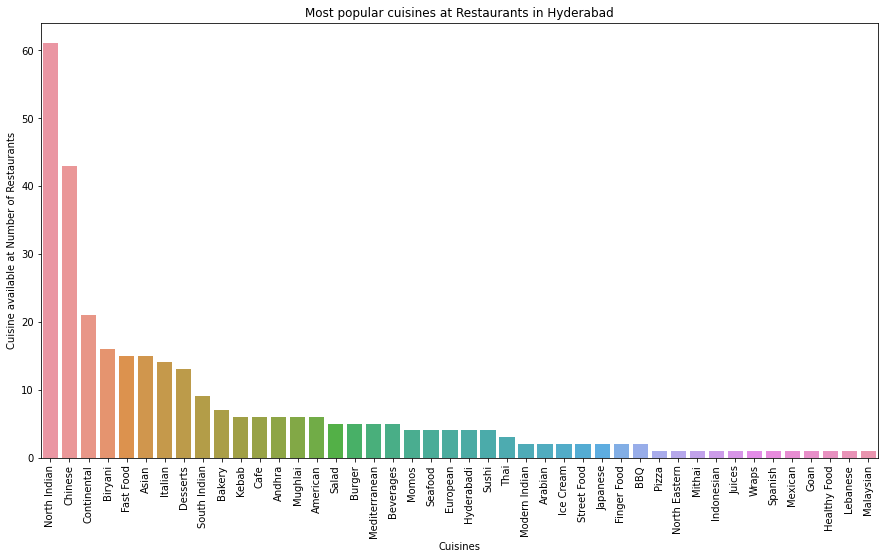

In [397]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=cuis_df, x='index', y= 'Counts of Restaurants')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants in Hyderabad')

In [398]:
import sys
import os

In [399]:
!pip install wordcloud

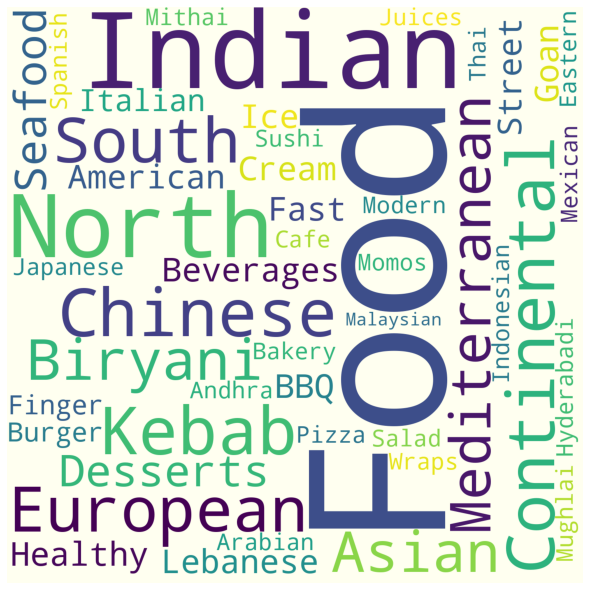

In [400]:
from wordcloud import WordCloud, STOPWORDS # checking cuisins using wordcloud
words_list = cuis_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='ivory',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [401]:
meta_df.info() # checking datatype so that we can modify accordingly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


### We have almost all the object types in restaurant names and metadata dataset named as data. Let's try converting them.

In [402]:
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64') # convertting to numerical data

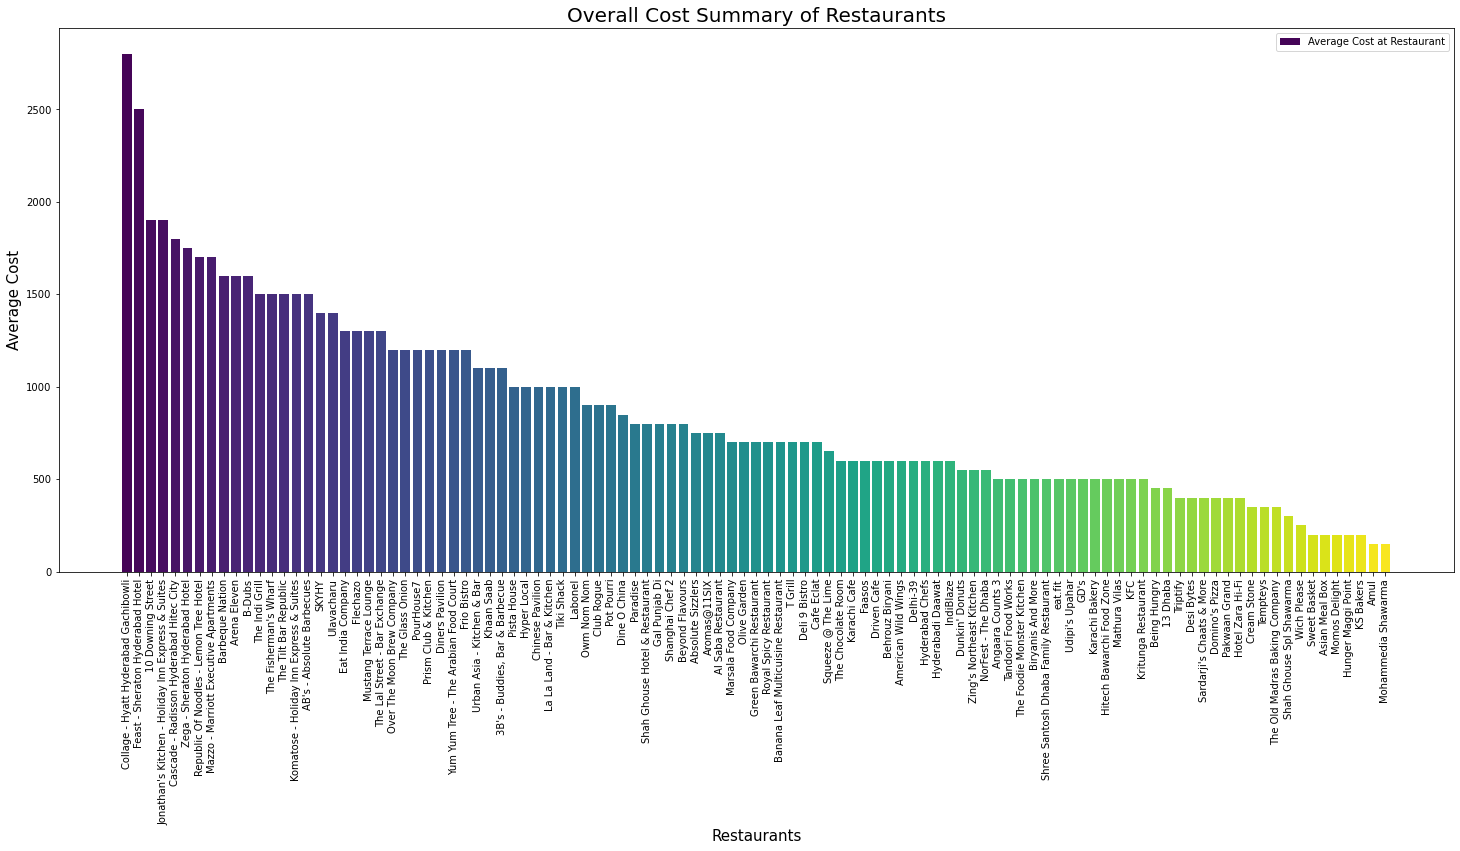

In [403]:
restaurants_cost=meta_df.groupby('Name')['Cost'].mean().reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants',size=20)
plt.legend(['Average Cost at Restaurant'])

### Above given range are the average cost for the restaurant restaurant wise

In [404]:
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
restaurants_cost.head(10)

Name    Cost
23                Collage - Hyatt Hyderabad Gachibowli  2800.0
35                    Feast - Sheraton Hyderabad Hotel  2500.0
0                                    10 Downing Street  1900.0
48   Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
20             Cascade - Radisson Hyderabad Hitec City  1800.0
102                    Zega - Sheraton Hyderabad Hotel  1750.0
74              Republic Of Noodles - Lemon Tree Hotel  1700.0
60               Mazzo - Marriott Executive Apartments  1700.0
14                                     Barbeque Nation  1600.0
9                                         Arena Eleven  1600.0

### Top 10 costly restaurant and their prices, let's see below in diagram as well.

Text(0.5, 1.0, '10 Most expensive Restaurants')

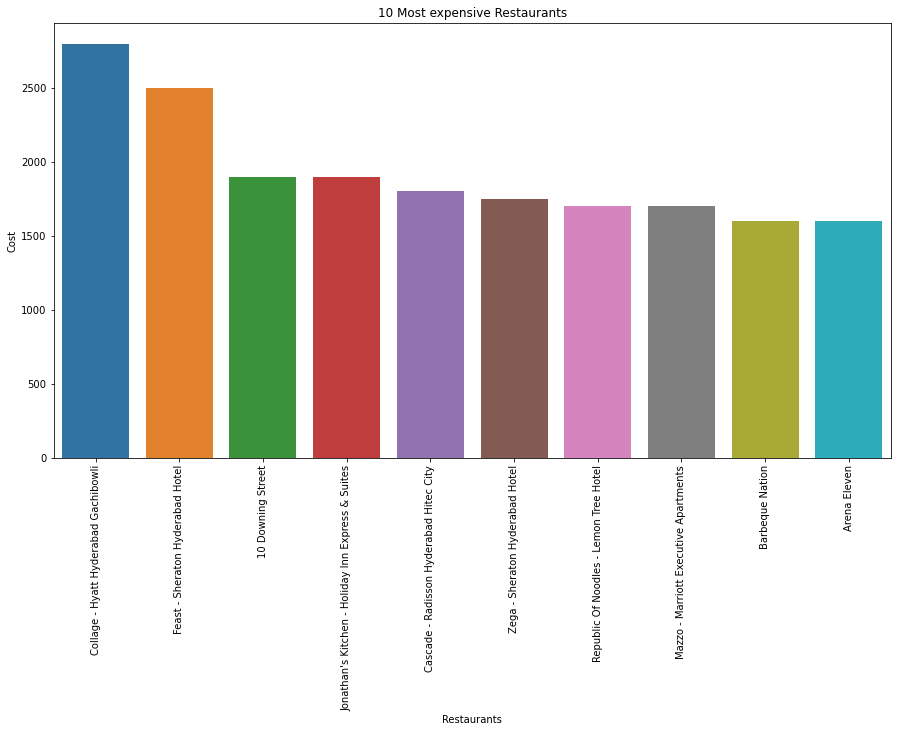

In [405]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=restaurants_cost.head(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most expensive Restaurants')

In [406]:
restaurants_cost.tail(10)

Name   Cost
93   The Old Madras Baking Company  350.0
79        Shah Ghouse Spl Shawarma  300.0
100                    Wich Please  250.0
83                    Sweet Basket  200.0
11                  Asian Meal Box  200.0
62                   Momos Delight  200.0
43              Hunger Maggi Point  200.0
50                       KS Bakers  200.0
7                             Amul  150.0
61             Mohammedia Shawarma  150.0

Text(0.5, 1.0, '10 Most cheap Restaurants')

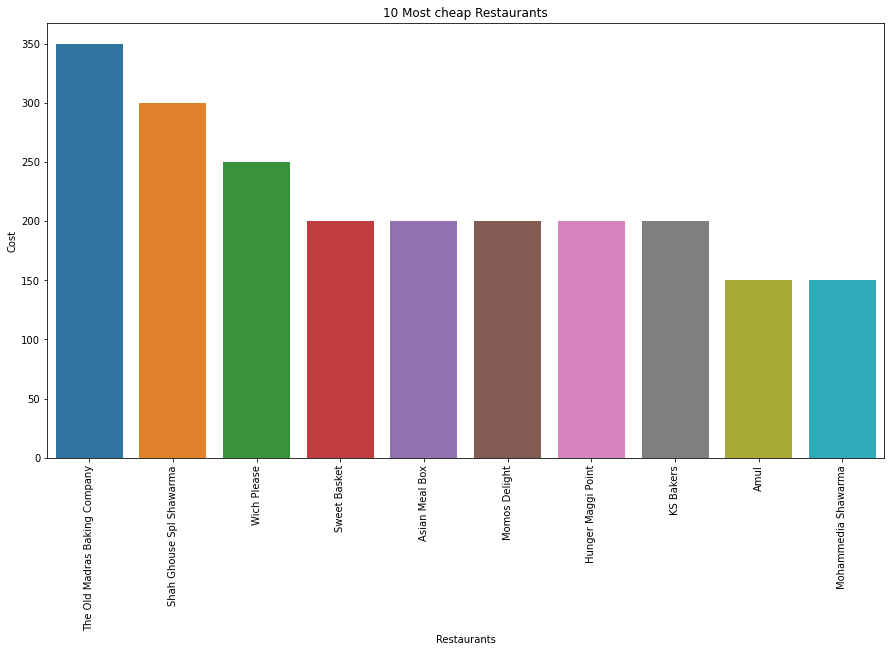

In [407]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=restaurants_cost.tail(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most cheap Restaurants')

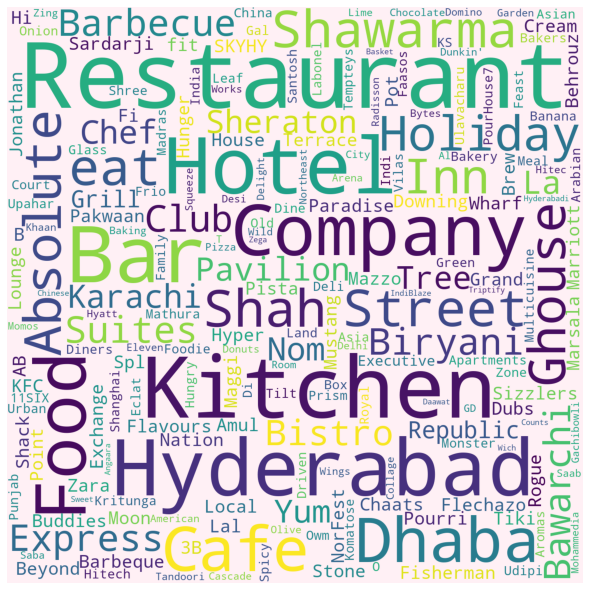

In [408]:
Rests = meta_df.Name.unique()
rest_string = ' '
for i in Rests:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Time for the
# Clustering

In [409]:
time_opened_weekly = [52.5,84,66.5,98,79,73.5,105,84,84,106.5,49,59.5,94.5,
                      84,66.5,84,73.5,94.5,84,77,57,52.5,88.5,133,86,78.5,72.5,
                      63,105,97,np.nan,91,63,91,126,77,46.2,56,79,73.5,77,84,
                      84,126,80.5,80.5,80.5,77,115.5,61.25,56,77,84,59.5,86,108.5,
                      71,52.5,94.5,91,86,49,87.5,80.5,73.5,70,87.5,84,84,77,49,49,
                      54,140,112,87.5,112,73.5,56,52.5,86,84,122.5,122.5,49,56,
                      98,112,84,84,84,168,168,59.5,91,78,77,98,84,52.5,84,91.5,77,115.5,59.5]

In [410]:
df2["time_opened_weekly(hours)"] = time_opened_weekly

In [411]:
df2['Cuisines'] = df2['Cuisines'].apply(lambda x : x.lower())

In [412]:
dframe=df2.copy()

In [413]:
dframe=dframe.loc[:,['Name','Cost','Cuisines','time_opened_weekly(hours)']]

In [414]:
def cuisine_list(cuisines):
  
   
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [415]:
dframe['cuisine']=dframe['Cuisines'].apply(lambda x:cuisine_list(x))

In [416]:
dframe.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                            Cuisines  \
0  chinese, continental, kebab, european, south i...   
1                     biryani, north indian, chinese   
2       asian, mediterranean, north indian, desserts   
3  biryani, north indian, chinese, seafood, bever...   
4  asian, continental, north indian, chinese, med...   

   time_opened_weekly(hours)  \
0                       52.5   
1                       84.0   
2                       66.5   
3                       98.0   
4                       79.0   

                                             cuisine  
0  [kebab, european, chinese, south indian, conti...  
1                   [chinese, north indian, biryani]  
2     [north indian, mediterranean, desserts, asian]  
3  [chinese, seafood, beverages, biryani, north i...  
4  [chinese, mediterranean, continental, asian, n...

In [417]:
dframe=dframe.explode('cuisine')
dframe.head()

Name Cost                                           Cuisines  \
0  Beyond Flavours  800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours  800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours  800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours  800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours  800  chinese, continental, kebab, european, south i...   

   time_opened_weekly(hours)       cuisine  
0                       52.5         kebab  
0                       52.5      european  
0                       52.5       chinese  
0                       52.5  south indian  
0                       52.5   continental

In [418]:
set(dframe["cuisine"]) # look for unique values

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [419]:
df=df1.merge(df2, left_on='Restaurant', right_on='Name').drop('Name',axis=1)# let's merge dataset to one

In [420]:
df.shape

(10000, 13)

In [421]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'time_opened_weekly(hours)'],
      dtype='object')

In [422]:
df.isnull().sum() # let's check now togather nan

Restaurant                      0
Reviewer                       38
Review                         45
Rating                         38
Metadata                       38
Time                           38
Pictures                        0
Links                           0
Cost                            0
Collections                  5000
Cuisines                        0
Timings                       100
time_opened_weekly(hours)     100
dtype: int64

In [423]:
df['Restaurant'].nunique()

100

In [424]:
df['Restaurant'].value_counts()

Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Restaurant, Length: 100, dtype: int64

In [425]:
df[(df['Review'].isnull())  & df['Rating'].isnull()].shape

(38, 13)

In [426]:
df[(df['Review'].isnull())  & df['Rating'].notnull()].shape

(7, 13)

In [427]:
df[(df['Review'].isnull())  & df['Rating'].notnull()]

Restaurant                Reviewer Review Rating  \
2360                Amul        Lakshmi Narayana    NaN      5   
5799        Being Hungry                   Surya    NaN      5   
6449     Hyderabad Chefs          Madhurimanne97    NaN      5   
6489     Hyderabad Chefs                  Harsha    NaN      5   
7954        Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228  Al Saba Restaurant                  Suresh    NaN      5   
8844      Domino's Pizza             Sayan Gupta    NaN      5   

                     Metadata             Time  Pictures  \
2360                0 Reviews  7/29/2018 18:00         0   
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0   
6449                 1 Review  7/23/2018 16:29         0   
6489                 1 Review   7/8/2018 21:19         0   
7954    1 Review , 1 Follower   8/9/2018 23:25         0   
8228                 1 Review  7/20/2018 22:42         0   
8844  2 Reviews , 2 Followers   8/9/2018 21:41         0   

                                                  Links Cost Collections  \
2360   https://www.zomato.com/hyderabad/amul-gachibowli  150         NaN   
5799  https://www.zomato.com/hyderabad/being-hungry-...  450         NaN   
6449  https://www.zomato.com/hyderabad/hyderabad-che...  600         NaN   
6489  https://www.zomato.com/hyderabad/hyderabad-che...  600         NaN   
7954  https://www.zomato.com/hyderabad/olive-garden-...  700         NaN   
8228  https://www.zomato.com/hyderabad/al-saba-resta...  750         NaN   
8844  https://www.zomato.com/hyderabad/dominos-pizza...  400         NaN   

                                               Cuisines  \
2360                                ice cream, desserts   
5799                              north indian, chinese   
6449                              north indian, chinese   
6489                              north indian, chinese   
7954        north indian, chinese, continental, biryani   
8228  north indian, chinese, seafood, biryani, hyder...   
8844                                   fast food, pizza   

                                Timings  time_opened_weekly(hours)  
2360                      10 AM to 5 AM                      133.0  
5799  12 Noon to 3 PM, 7 PM to 11:30 PM                       52.5  
6449                12 Noon to 10:30 PM                       73.5  
6489                12 Noon to 10:30 PM                       73.5  
7954  12 Noon to 3:30 PM, 7 PM to 11 PM                       52.5  
8228                   6 AM to 11:30 PM                      122.5  
8844                     11 AM to 11 PM                       84.0

In [428]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [429]:
df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

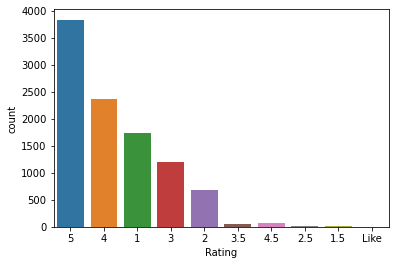

In [430]:
sns.countplot(df['Rating'])

In [431]:
df_like=df[df['Rating']=='Like']

In [432]:
df_like['Rating']='5'

In [433]:
df=df[df['Rating']!='Like']

In [434]:
df.shape

(9999, 13)

In [435]:
df = pd.concat([df, df_like])

In [436]:
df.shape

(10000, 13)

In [437]:
#changing data type of rating
df['Rating']=df['Rating'].astype(float)

In [438]:
df[df['Rating'].isnull()].head()

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaN         0   
8778  American Wild Wings      NaN    NaN     NaN      NaN  NaN         0   
8779  American Wild Wings      NaN    NaN     NaN      NaN  NaN         0   
8780  American Wild Wings      NaN    NaN     NaN      NaN  NaN         0   
8781  American Wild Wings      NaN    NaN     NaN      NaN  NaN         0   

                                                  Links Cost  \
8777  https://www.zomato.com/hyderabad/american-wild...  600   
8778  https://www.zomato.com/hyderabad/american-wild...  600   
8779  https://www.zomato.com/hyderabad/american-wild...  600   
8780  https://www.zomato.com/hyderabad/american-wild...  600   
8781  https://www.zomato.com/hyderabad/american-wild...  600   

                                      Collections  \
8777  Food Hygiene Rated Restaurants in Hyderabad   
8778  Food Hygiene Rated Restaurants in Hyderabad   
8779  Food Hygiene Rated Restaurants in Hyderabad   
8780  Food Hygiene Rated Restaurants in Hyderabad   
8781  Food Hygiene Rated Restaurants in Hyderabad   

                                Cuisines          Timings  \
8777  american, fast food, salad, burger  12 Noon to 4 AM   
8778  american, fast food, salad, burger  12 Noon to 4 AM   
8779  american, fast food, salad, burger  12 Noon to 4 AM   
8780  american, fast food, salad, burger  12 Noon to 4 AM   
8781  american, fast food, salad, burger  12 Noon to 4 AM   

      time_opened_weekly(hours)  
8777                      112.0  
8778                      112.0  
8779                      112.0  
8780                      112.0  
8781                      112.0

In [439]:
df[df['Rating'].isnull()]['Restaurant'].nunique()

2

In [440]:
df=df.drop_duplicates(subset=df.columns, keep=False)

In [441]:
df.shape  #38 duplicates

(9962, 13)

In [442]:
df['Cost'] = df['Cost'].str.replace(',', '')

In [443]:
df['Cost'] = df['Cost'].astype(float)

<AxesSubplot:xlabel='Cost', ylabel='Density'>

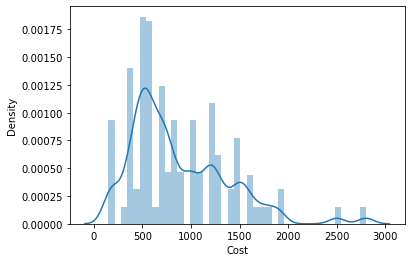

In [444]:
sns.distplot(df['Cost'])

In [445]:
df[df['Collections'].isnull()]['Restaurant'].nunique()

50

In [ ]:
##Cuisins

In [446]:
cuisines = df2['Cuisines']
cuisines = cuisines.apply(lambda x : x.lower())

In [447]:
from collections import Counter  

In [448]:
all_cuisines = ', '.join(i for i in cuisines.tolist())
print(all_cuisines)
all_cuisines = Counter(all_cuisines.split(', '))
print(all_cuisines)
all_cuisines = pd.DataFrame.from_dict(all_cuisines, orient='index', dtype='int')
all_cuisines.columns = ['No Of Restaurents']
all_cuisines.sort_values(by='No Of Restaurents', ascending=False, inplace=True)
cusines=pd.DataFrame(all_cuisines[0:10])
cusines

chinese, continental, kebab, european, south indian, north indian, biryani, north indian, chinese, asian, mediterranean, north indian, desserts, biryani, north indian, chinese, seafood, beverages, asian, continental, north indian, chinese, mediterranean, seafood, goan, north indian, continental, asian, healthy food, north indian, continental, south indian, lebanese, american, chinese, north indian, kebab, south indian, ice cream, desserts, street food, north indian, fast food, mediterranean, north indian, kebab, bbq, continental, american, chinese, north indian, italian, finger food, european, mediterranean, north indian, burger, fast food, north indian, chinese, north indian, north indian, chinese, continental, north indian, chinese, biryani, north indian, north indian, japanese, italian, salad, sushi, american, ice cream, desserts, north indian, chinese, continental, continental, mexican, italian, north indian, chinese, salad, north indian, mediterranean, european, mughlai, biryani, 

No Of Restaurents
north indian                 61
chinese                      43
continental                  21
biryani                      16
fast food                    15
asian                        15
italian                      14
desserts                     13
south indian                  9
bakery                        7

In [ ]:
## sentimental analysis

In [449]:
sent_df=df.loc[:,['Review','Rating']]

In [450]:
#drop review having nan
sent_df=sent_df.dropna() 

In [451]:
sent_df.head()

Review  Rating
0  The ambience was good, food was quite good . h...     5.0
1  Ambience is too good for a pleasant evening. S...     5.0
2  A must try.. great food great ambience. Thnx f...     5.0
3  Soumen das and Arun was a great guy. Only beca...     5.0
4  Food is good.we ordered Kodi drumsticks and ba...     5.0

In [452]:
sent_df.set_index("Review", inplace = True)

In [453]:
#Reading review for rating 3
rrr=sent_df[sent_df['Rating']==3]

In [454]:
rrr.head()

Rating
Review                                                    
Short review: Decent breads and starters, bad S...     3.0
The reason for giving only a 3 star is because ...     3.0
We went for lunch buffet yesterday and took a c...     3.0
We happened to go to this place on last sunday ...     3.0
I have been to this place twice and had 2 diffe...     3.0

### emoji's avalilable so need to drop 

In [455]:
rrr=sent_df[sent_df['Rating']==3.5]

In [456]:
rrr.head()

Rating
Review                                                    
It's too crowded with delivery executives all t...     3.5
Nice pocket friendly place. Burgers and sandwic...     3.5
Well, all the time I have ordered here it has b...     3.5
chocolate truffle is great here!\nFerrerro roch...     3.5
KS bakers , known for its food in bakery items....     3.5

In [457]:
# review counts
sent_df['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [458]:
sent_df.isnull().sum()

Rating    0
dtype: int64

# Now let's say that
**Sentiment is greatrer than 3.5 than map it to 1**

**Sentiment is less than 3.5 than map it to 0**

In [459]:
def sentiment(rating):
  if rating>=3.5:
    return 1 # positive sentiment
  else:
    return 0


In [460]:
sent_df['sentiment']=sent_df['Rating'].apply(lambda x:sentiment(x))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

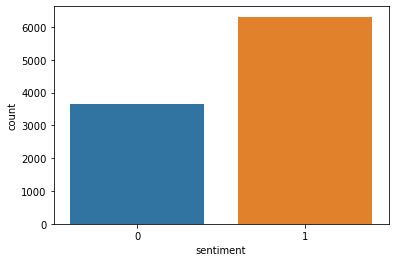

In [461]:
sns.countplot(sent_df['sentiment'])

In [463]:
sent_df.reset_index(inplace=True)

In [464]:
sent_df.head()

index                                             Review  Rating  sentiment
0      0  The ambience was good, food was quite good . h...     5.0          1
1      1  Ambience is too good for a pleasant evening. S...     5.0          1
2      2  A must try.. great food great ambience. Thnx f...     5.0          1
3      3  Soumen das and Arun was a great guy. Only beca...     5.0          1
4      4  Food is good.we ordered Kodi drumsticks and ba...     5.0          1

# Text Preprocessing

In [465]:
#!/usr/bin/env python
import re

In [466]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)



In [467]:
sent_df['Review']=sent_df['Review'].apply(lambda x:deEmojify(x))

In [468]:
rrr=sent_df[sent_df['Rating']==3.5]
rrr.set_index("Review", inplace = True)

In [469]:
#check weather emoji removed or not
rrr.head(10)

index  Rating  sentiment
Review                                                                      
It's too crowded with delivery executives all t...    975     3.5          1
Nice pocket friendly place. Burgers and sandwic...   5938     3.5          1
Well, all the time I have ordered here it has b...   5944     3.5          1
chocolate truffle is great here!\nFerrerro roch...   5966     3.5          1
KS bakers , known for its food in bakery items....   5986     3.5          1
Ordered chicken and cheese burger and egg puff ...   5987     3.5          1
The burger was just decent but complete value f...   5988     3.5          1
It's a good option but the bread they use for h...   5993     3.5          1
Neat and clean ambiance. Small place but it's w...   5995     3.5          1
Komatose on a Sunday night is the perfect place...   6570     3.5          1

# **Remove Ratings and \n from review**

In [470]:
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating)
  return rating

In [471]:
sent_df['Review']=sent_df['Review'].apply(lambda x:remove_rating(x))

In [472]:
rrr=sent_df[sent_df['Rating']==3.5]
rrr.set_index("Review", inplace = True)

In [473]:
rrr.head()

index  Rating  sentiment
Review                                                                      
It's too crowded with delivery executives all t...    975     3.5          1
Nice pocket friendly place. Burgers and sandwic...   5938     3.5          1
Well, all the time I have ordered here it has b...   5944     3.5          1
chocolate truffle is great here!Ferrerro rocher...   5966     3.5          1
KS bakers , known for its food in bakery items....   5986     3.5          1

### Convert to lower case latters

In [474]:
sent_df['Review']=sent_df['Review'].apply(lambda x:x.lower())

In [475]:
sent_df.head()

index                                             Review  Rating  sentiment
0      0  the ambience was good, food was quite good . h...     5.0          1
1      1  ambience is too good for a pleasant evening. s...     5.0          1
2      2  a must try.. great food great ambience. thnx f...     5.0          1
3      3  soumen das and arun was a great guy. only beca...     5.0          1
4      4  food is good.we ordered kodi drumsticks and ba...     5.0          1

### Getting verb and adjective

In [476]:

pip install -U spacy

In [479]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])


def get_adj_VERB(text):
    # create spacy 
    doc = nlp(text)
    noun_adj=[]
    for token in doc:
        # check token pos
        if token.pos_=='ADJ' or token.pos_=='VERB' :
            
            noun_adj.append(token.text)

    return ' '.join(noun_adj)

In [480]:
sent_df['verb_adj']=sent_df['Review'].apply(lambda x:get_adj_VERB(x))

In [481]:
sent_df.head()

index                                             Review  Rating  \
0      0  the ambience was good, food was quite good . h...     5.0   
1      1  ambience is too good for a pleasant evening. s...     5.0   
2      2  a must try.. great food great ambience. thnx f...     5.0   
3      3  soumen das and arun was a great guy. only beca...     5.0   
4      4  food is good.we ordered kodi drumsticks and ba...     5.0   

   sentiment                                           verb_adj  
0          1  good good had cost effective sate chill courte...  
1          1                     good pleasant prompt good good  
2          1              try great great thnx personal amazing  
3          1                              great good like visit  
4          1           ordered good pradeep served enjoyed good

### Remove Number

In [482]:
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

In [483]:
sent_df['Review']=sent_df['Review'].apply(lambda x:remove_number(x))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:remove_number(x))

### convert short form

In [484]:
pip install contractions==0.0.18 #installing contractions

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [485]:
import contractions

In [486]:
sent_df['Review']=sent_df['Review'].apply(lambda x:contractions.fix(x))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:contractions.fix(x))

In [487]:
rrr=sent_df[sent_df['Rating']==3.5]
rrr.set_index("Review", inplace = True)

In [488]:
rrr.head()

index  Rating  sentiment  \
Review                                                                         
it is too crowded with delivery executives all ...    975     3.5          1   
nice pocket friendly place. burgers and sandwic...   5938     3.5          1   
well, all the time i have ordered here it has b...   5944     3.5          1   
chocolate truffle is great here!ferrerro rocher...   5966     3.5          1   
ks bakers , known for its food in bakery items....   5986     3.5          1   

                                                                                             verb_adj  
Review                                                                                                 
it is too crowded with delivery executives all ...  crowded find sit better provide preferable onl...  
nice pocket friendly place. burgers and sandwic...  nice friendly tasty have wide different upper ...  
well, all the time i have ordered here it has b...  ordered sweet considered tried know guess work...  
chocolate truffle is great here!ferrerro rocher...                                         great sets  
ks bakers , known for its food in bakery items....  known items.ordered hot italian hot stuffed ta...

### Remove multiple spaces

In [489]:
sent_df['Review']=sent_df['Review'].apply(lambda x: " ".join(x.split()))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:" ".join(x.split()))

In [490]:
sent_df.head()

index                                             Review  Rating  \
0      0  the ambience was good, food was quite good . h...     5.0   
1      1  ambience is too good for a pleasant evening. s...     5.0   
2      2  a must try.. great food great ambience. thnx f...     5.0   
3      3  soumen das and arun was a great guy. only beca...     5.0   
4      4  food is good.we ordered kodi drumsticks and ba...     5.0   

   sentiment                                           verb_adj  
0          1  good good had cost effective sate chill courte...  
1          1                     good pleasant prompt good good  
2          1              try great great thnx personal amazing  
3          1                              great good like visit  
4          1           ordered good pradeep served enjoyed good

### Remove punctuations or special char

In [491]:
import string

In [492]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc

In [493]:
sent_df['Review'] = sent_df['Review'].apply(text_process)
sent_df['verb_adj']=sent_df['verb_adj'].apply(text_process)

In [494]:
sent_df.head()

index                                             Review  Rating  \
0      0  the ambience was good food was quite good  had...     5.0   
1      1  ambience is too good for a pleasant evening se...     5.0   
2      2  a must try great food great ambience thnx for ...     5.0   
3      3  soumen das and arun was a great guy only becau...     5.0   
4      4  food is goodwe ordered kodi drumsticks and bas...     5.0   

   sentiment                                           verb_adj  
0          1  good good had cost effective sate chill courte...  
1          1                     good pleasant prompt good good  
2          1              try great great thnx personal amazing  
3          1                              great good like visit  
4          1           ordered good pradeep served enjoyed good

### Remove stop words

In [495]:
import spacy

In [496]:
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print('There are :',len(sw_spacy) ,'stop words in nltk')

There are : 326 stop words in nltk


In [497]:
list(sw_spacy)[0:10]

['seemed',
 'under',
 'many',
 'elsewhere',
 'sixty',
 'already',
 'it',
 'somehow',
 'take',
 'noone']

In [498]:
sent_df['Review']=sent_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))

In [499]:
sent_df.head()

index                                             Review  Rating  \
0      0  ambience good food good saturday lunch cost ef...     5.0   
1      1  ambience good pleasant evening service prompt ...     5.0   
2      2  try great food great ambience thnx service pra...     5.0   
3      3  soumen das arun great guy behavior sincerety g...     5.0   
4      4  food goodwe ordered kodi drumsticks basket mut...     5.0   

   sentiment                                           verb_adj  
0          1  good good cost effective sate chill courteous ...  
1          1                     good pleasant prompt good good  
2          1              try great great thnx personal amazing  
3          1                              great good like visit  
4          1           ordered good pradeep served enjoyed good

### Converting words to root form

In [500]:
# #download small spacy model
#!python -m spacy download en_core_web_sm(Optional, can do using conda twerminal as well)

In [501]:
spacy.load('en_core_web_sm')

In [502]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [503]:
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

In [504]:
sent_df['Review']=sent_df['Review'].apply(lambda x:lemmatization_(x))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:lemmatization_(x))

In [505]:
sent_df.head()

index                                             Review  Rating  \
0      0  ambience good food good saturday lunch cost ef...     5.0   
1      1  ambience good pleasant evening service prompt ...     5.0   
2      2  try great food great ambience thnx service pra...     5.0   
3      3  soumen das arun great guy behavior sincerety g...     5.0   
4      4  food goodwe order kodi drumstick basket mutton...     5.0   

   sentiment                                           verb_adj  
0          1  good good cost effective sate chill courteous ...  
1          1                     good pleasant prompt good good  
2          1              try great great thnx personal amazing  
3          1                              great good like visit  
4          1                order good pradeep serve enjoy good

In [506]:
' '.join(sent_df['Review'])

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parentswaiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman das kudos service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro well servicefood good papiya good hostess ur caption good restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro pra

In [507]:
word=' '.join(sent_df['Review']).split()
words_df=pd.Series(word)

In [508]:
#top 10 common words
top10=words_df.value_counts()[0:10]
top10

good       7805
food       5912
place      5813
order      3429
chicken    2909
service    2791
taste      2745
try        1918
time       1886
visit      1835
dtype: int64

In [509]:
word=' '.join(sent_df['verb_adj'])
word=' '.join(sent_df['verb_adj']).split()
word_df=pd.Series(word)

In [510]:
rare_word_noun=word_df.value_counts(ascending=True)[:5050]

In [511]:
rare_word_noun

orderedpaneer        1
evrythe              1
vehment              1
naanbutter           1
paneerricechicken    1
                    ..
cry                  4
represent            4
uneatable            4
differentiate        4
operate              4
Length: 5050, dtype: int64

In [512]:
#Remove rare words whose count is less than 3
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:" ".join([i for i in x.split() if i not in rare_word_noun]))


In [513]:
rare_word=words_df.value_counts(ascending=True)[0:20000]
rare_word

politly      1
grossly      1
sofasa       1
madetaste    1
forfrench    1
            ..
poison       9
nom          9
aura         9
lucky        9
magic        9
Length: 20000, dtype: int64

In [514]:
#Remove rare words

sent_df['Review']=sent_df['Review'].apply(lambda x:" ".join([i for i in x.split() if i not in rare_word]))

In [515]:
#keping words having length between 2to40 
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>3])
  review=" ".join([i for i in review.split() if len(i)<40])
  return review


In [516]:
sent_df['Review']=sent_df['Review'].apply(lambda x:len_less_than2(x))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:len_less_than2(x))

In [517]:
from wordcloud import WordCloud

Most common words in review


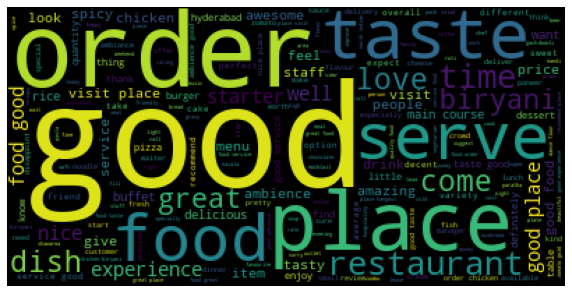

In [518]:
print('Most common words in review')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(' '.join(sent_df['Review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### Most common verb and adjective

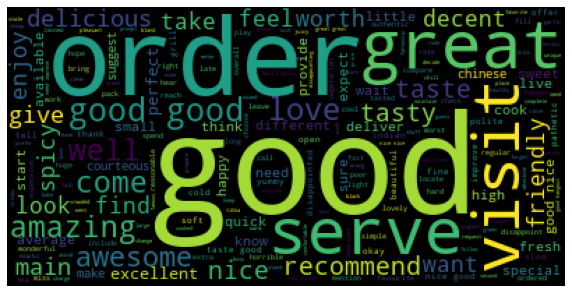

In [519]:
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(' '.join(sent_df['verb_adj']))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Let's use some of the model in iteration to perform the the clustering and predictions
### let's also try some of approaches like GridsearchCV techniques to improve the model subsequently.

## Let's try for different values same algorithm multiple times with score improvement/change in the scores and see the model behaviours.


# Starting from NLP

### Tf-idfVectorizer

In [520]:
x = sent_df['Review'] # defining x and y variables
y=sent_df['sentiment']

In [521]:
from sklearn.model_selection import train_test_split # IMPORTING TRAIN TEST SPLIT
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.3,stratify=sent_df['sentiment'])

In [522]:
label_test.value_counts()

1    1895
0    1092
Name: sentiment, dtype: int64

In [523]:
label_train.value_counts()

1    4421
0    2547
Name: sentiment, dtype: int64

In [524]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [525]:
tfid_vectorizer = 'english'

In [526]:
tfid_vectorizer = TfidfVectorizer()

In [527]:
vectorizer = TfidfVectorizer() # INTENTIATING THE VECTORIZER FOR THE CONVERTING WORDS INTO THE NUMERIC VALUES
x_train= vectorizer.fit_transform(msg_train)
x_test=vectorizer.transform(msg_test)

In [528]:
train_array= x_train.toarray()
test_array = x_test.toarray()

In [529]:
tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())

In [530]:
tfidf_df

able  absolute  absolutely  accept  acceptable  accessible  accommodate  \
0      0.0       0.0         0.0     0.0         0.0         0.0          0.0   
1      0.0       0.0         0.0     0.0         0.0         0.0          0.0   
2      0.0       0.0         0.0     0.0         0.0         0.0          0.0   
3      0.0       0.0         0.0     0.0         0.0         0.0          0.0   
4      0.0       0.0         0.0     0.0         0.0         0.0          0.0   
...    ...       ...         ...     ...         ...         ...          ...   
6963   0.0       0.0         0.0     0.0         0.0         0.0          0.0   
6964   0.0       0.0         0.0     0.0         0.0         0.0          0.0   
6965   0.0       0.0         0.0     0.0         0.0         0.0          0.0   
6966   0.0       0.0         0.0     0.0         0.0         0.0          0.0   
6967   0.0       0.0         0.0     0.0         0.0         0.0          0.0   

      accompaniment  accompany  accord  ...  young  yumm  yummm     yummy  \
0               0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
1               0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
2               0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
3               0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
4               0.0        0.0     0.0  ...    0.0   0.0    0.0  0.356067   
...             ...        ...     ...  ...    ...   ...    ...       ...   
6963            0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
6964            0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
6965            0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
6966            0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   
6967            0.0        0.0     0.0  ...    0.0   0.0    0.0  0.000000   

      zafrani  zega  zero  zing  zinger  zomato  
0         0.0   0.0   0.0   0.0     0.0     0.0  
1         0.0   0.0   0.0   0.0     0.0     0.0  
2         0.0   0.0   0.0   0.0     0.0     0.0  
3         0.0   0.0   0.0   0.0     0.0     0.0  
4         0.0   0.0   0.0   0.0     0.0     0.0  
...       ...   ...   ...   ...     ...     ...  
6963      0.0   0.0   0.0   0.0     0.0     0.0  
6964      0.0   0.0   0.0   0.0     0.0     0.0  
6965      0.0   0.0   0.0   0.0     0.0     0.0  
6966      0.0   0.0   0.0   0.0     0.0     0.0  
6967      0.0   0.0   0.0   0.0     0.0     0.0  

[6968 rows x 2089 columns]

### MultinomialNB

In [679]:
from sklearn.naive_bayes import MultinomialNB #IMPORTING LIBRARIES AND MODEL FOR NAIVE BAYES, SINCE ITS TOO QUICK ALGORITHM WILL TRY IN ITERATION

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2547
           1       0.83      0.94      0.88      4421

    accuracy                           0.84      6968
   macro avg       0.85      0.81      0.82      6968
weighted avg       0.84      0.84      0.84      6968



              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1092
           1       0.82      0.92      0.86      1895

    accuracy                           0.82      2987
   macro avg       0.82      0.78      0.79      2987
weighted avg       0.82      0.82      0.81      2987



In [680]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8065740242677651
roc_auc_score for test set :  0.7793518706447466


[[1734  813]
 [ 148 4273]]


Text(0.5, 1.0, 'Confusion Matrix')

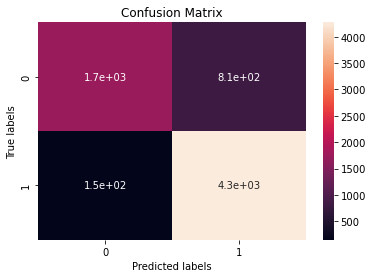

In [533]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(label_train,train_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

[[ 643  449]
 [  98 1797]]


Text(0.5, 1.0, 'Confusion Matrix')

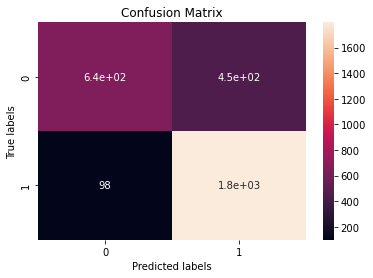

In [534]:
# Get the confusion matrix for both train and test
cm = confusion_matrix(label_test,test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [535]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds)) # SCORES FOR THE TEST AND TRAIN
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8236621766390145
roc_auc_score for test set :  0.7685563996250012


### LogisticRegression

In [683]:
w={0: 2.0, 1: 1.0} # WORD FREQUENCY ASSIGNMENT FOR 0 AND 1 WHERE 0 = 2.0 AND 1 = 1.0

In [684]:
clf = LogisticRegression(class_weight=w,max_iter=1000)
clf.fit(train_array,label_train)

LogisticRegression(class_weight={0: 2.0, 1: 1.0}, max_iter=1000)

In [685]:
train_preds = clf.predict(train_array) # PREDICTING
test_preds = clf.predict(test_array)

In [686]:
print(classification_report(label_train,train_preds)) # PRINTING SCORES FOR LOGISTIC REGRESSION MODEL
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2547
           1       0.94      0.86      0.90      4421

    accuracy                           0.87      6968
   macro avg       0.86      0.88      0.87      6968
weighted avg       0.88      0.87      0.88      6968



              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1092
           1       0.88      0.81      0.84      1895

    accuracy                           0.81      2987
   macro avg       0.80      0.81      0.80      2987
weighted avg       0.82      0.81      0.81      2987



In [687]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds)) # PRINTING SCORES FOR TEST AND TRAINING
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8791021933988006
roc_auc_score for test set :  0.8091231987010351


[[2325  222]
 [ 623 3798]]


Text(0.5, 1.0, 'Confusion Matrix')

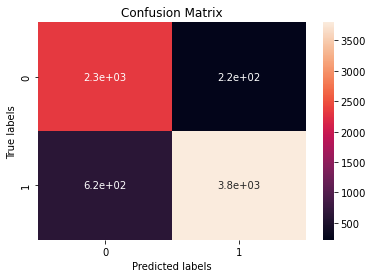

In [542]:
cm = confusion_matrix(label_train,train_preds) # CONFUSION MATRICS VISULAIZATION FOR CURRENT AND WRONGLY CLASSIFIED
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

[[ 921  171]
 [ 344 1551]]


Text(0.5, 1.0, 'Confusion Matrix')

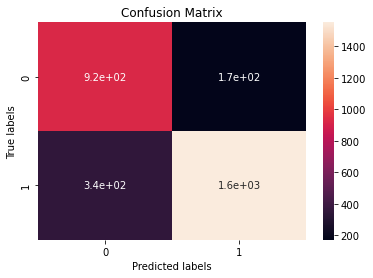

In [543]:
cm = confusion_matrix(label_test,test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

### DecisionTreeClassifier

In [544]:
#fiting model AND USING CROSSVALIDATION FOR BEST PARAMETER FINDING FOR ABOVE GIVEN w FREQUENCY
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [545]:
classifier.best_params_ # FINDING THE BEST PARAMETERS

{'max_depth': 13, 'max_leaf_nodes': 25}

In [546]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 21)
classifier.fit(train_array,label_train)# FITTING THE DATASET TO DECISION TREE

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=21)

In [547]:
train_preds = classifier.predict(train_array)# PREDICTING
test_preds = classifier.predict(test_array)

In [548]:
print(classification_report(label_train,train_preds)) # PRINTING THE SCORES
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68      2547
           1       0.81      0.85      0.83      4421

    accuracy                           0.78      6968
   macro avg       0.76      0.75      0.75      6968
weighted avg       0.77      0.78      0.77      6968



              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1092
           1       0.79      0.85      0.82      1895

    accuracy                           0.76      2987
   macro avg       0.74      0.73      0.74      2987
weighted avg       0.76      0.76      0.76      2987



In [549]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds)) # SCORES FOR DECSION TREE
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7472268690842426
roc_auc_score for test set :  0.7304534295959098


### RandomForestClassifier

In [550]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]} # USING RANDOM FOREST AND CROSS VALIDATION
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [551]:
classifier.best_params_ # BEST PARAMETERS FOR THE MODEL

{'max_depth': 13, 'n_estimators': 300}

In [552]:
classifier = RandomForestClassifier(class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0})

In [553]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [554]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2547
           1       0.99      0.98      0.99      4421

    accuracy                           0.98      6968
   macro avg       0.98      0.98      0.98      6968
weighted avg       0.98      0.98      0.98      6968



              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1092
           1       0.84      0.91      0.87      1895

    accuracy                           0.83      2987
   macro avg       0.83      0.80      0.81      2987
weighted avg       0.83      0.83      0.83      2987



In [555]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.9841476509435327
roc_auc_score for test set :  0.8042946060096455


### Bag of words

In [556]:
from sklearn.feature_extraction.text import CountVectorizer # USING BAG OF WORDS MODEL FOR TEXTUAL UNDERSTANDING AND IMPORTING LIBRARIES

In [557]:
cv=CountVectorizer() # INSTENTIATING THE VECTORIZER WHICH WILL CONVERT THE WORDS INTO NUMERICAL VALUES
x_train= cv.fit_transform(msg_train)# FITING AND TRANSFORMING THE TRAIN DATASET
x_test=cv.transform(msg_test) # TRANSFORMING THE TEST


In [558]:
train_array= x_train.toarray()
test_array = x_test.toarray()

In [559]:
bag_of_words=pd.DataFrame(train_array,columns=cv.get_feature_names())

In [560]:
bag_of_words.head()

able  absolute  absolutely  accept  acceptable  accessible  accommodate  \
0     0         0           0       0           0           0            0   
1     0         0           0       0           0           0            0   
2     0         0           0       0           0           0            0   
3     0         0           0       0           0           0            0   
4     0         0           0       0           0           0            0   

   accompaniment  accompany  accord  ...  young  yumm  yummm  yummy  zafrani  \
0              0          0       0  ...      0     0      0      0        0   
1              0          0       0  ...      0     0      0      0        0   
2              0          0       0  ...      0     0      0      0        0   
3              0          0       0  ...      0     0      0      0        0   
4              0          0       0  ...      0     0      0      1        0   

   zega  zero  zing  zinger  zomato  
0     0     0     0       0       0  
1     0     0     0       0       0  
2     0     0     0       0       0  
3     0     0     0       0       0  
4     0     0     0       0       0  

[5 rows x 2089 columns]

#### DecisionTreeClassifier

In [565]:
#fiting model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [566]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [567]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 23)
classifier.fit(train_array,label_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=23)

In [568]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2547
           1       0.80      0.86      0.83      4421

    accuracy                           0.77      6968
   macro avg       0.76      0.74      0.75      6968
weighted avg       0.77      0.77      0.77      6968



              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1092
           1       0.79      0.85      0.82      1895

    accuracy                           0.76      2987
   macro avg       0.74      0.73      0.73      2987
weighted avg       0.76      0.76      0.76      2987



In [569]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7409344006951155
roc_auc_score for test set :  0.7261694549953125


### RandomForestClassifier

In [570]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [571]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 300}

In [572]:
classifier = RandomForestClassifier(max_depth=13, n_estimators=300, class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0}, max_depth=13,
                       n_estimators=300)

In [573]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      2547
           1       0.95      0.72      0.82      4421

    accuracy                           0.80      6968
   macro avg       0.81      0.83      0.80      6968
weighted avg       0.85      0.80      0.80      6968



              precision    recall  f1-score   support

           0       0.61      0.85      0.71      1092
           1       0.89      0.69      0.78      1895

    accuracy                           0.75      2987
   macro avg       0.75      0.77      0.75      2987
weighted avg       0.79      0.75      0.75      2987



In [574]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8289695458028733
roc_auc_score for test set :  0.7721225124919056


### Training on adjective and verbs

In [576]:
x = sent_df['verb_adj']
y=sent_df['sentiment']

from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.3,stratify=sent_df['sentiment'])

tfid_vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()
x_train= vectorizer.fit_transform(msg_train)
x_test=vectorizer.transform(msg_test)


train_array= x_train.toarray()
test_array = x_test.toarray()

tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())

In [577]:
tfidf_df

able  absolute  accept  acceptable  accessible  accommodate  \
0      0.0       0.0     0.0         0.0         0.0          0.0   
1      0.0       0.0     0.0         0.0         0.0          0.0   
2      0.0       0.0     0.0         0.0         0.0          0.0   
3      0.0       0.0     0.0         0.0         0.0          0.0   
4      0.0       0.0     0.0         0.0         0.0          0.0   
...    ...       ...     ...         ...         ...          ...   
6963   0.0       0.0     0.0         0.0         0.0          0.0   
6964   0.0       0.0     0.0         0.0         0.0          0.0   
6965   0.0       0.0     0.0         0.0         0.0          0.0   
6966   0.0       0.0     0.0         0.0         0.0          0.0   
6967   0.0       0.0     0.0         0.0         0.0          0.0   

      accompanied  accompany  accord  active  ...  worthless  worthy  wrap  \
0             0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
1             0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
2             0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
3             0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
4             0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
...           ...        ...     ...     ...  ...        ...     ...   ...   
6963          0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
6964          0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
6965          0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
6966          0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   
6967          0.0        0.0     0.0     0.0  ...        0.0     0.0   0.0   

      write  writing  wrong  yellow  young  yummy  zomato  
0       0.0      0.0    0.0     0.0    0.0    0.0     0.0  
1       0.0      0.0    0.0     0.0    0.0    0.0     0.0  
2       0.0      0.0    0.0     0.0    0.0    0.0     0.0  
3       0.0      0.0    0.0     0.0    0.0    0.0     0.0  
4       0.0      0.0    0.0     0.0    0.0    0.0     0.0  
...     ...      ...    ...     ...    ...    ...     ...  
6963    0.0      0.0    0.0     0.0    0.0    0.0     0.0  
6964    0.0      0.0    0.0     0.0    0.0    0.0     0.0  
6965    0.0      0.0    0.0     0.0    0.0    0.0     0.0  
6966    0.0      0.0    0.0     0.0    0.0    0.0     0.0  
6967    0.0      0.0    0.0     0.0    0.0    0.0     0.0  

[6968 rows x 1458 columns]

### MultinomialNB

In [578]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      2547
           1       0.82      0.96      0.89      4421

    accuracy                           0.84      6968
   macro avg       0.86      0.80      0.82      6968
weighted avg       0.85      0.84      0.83      6968



              precision    recall  f1-score   support

           0       0.86      0.59      0.70      1092
           1       0.80      0.95      0.87      1895

    accuracy                           0.82      2987
   macro avg       0.83      0.77      0.79      2987
weighted avg       0.82      0.82      0.81      2987



In [579]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7975635967360334
roc_auc_score for test set :  0.7692626634579142


### LogisticRegression

In [580]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000,class_weight=w)
clf.fit(train_array,label_train)

train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2547
           1       0.93      0.83      0.88      4421

    accuracy                           0.85      6968
   macro avg       0.84      0.86      0.85      6968
weighted avg       0.87      0.85      0.86      6968



              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1092
           1       0.90      0.79      0.84      1895

    accuracy                           0.81      2987
   macro avg       0.80      0.82      0.81      2987
weighted avg       0.83      0.81      0.82      2987



In [581]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8630125946168157
roc_auc_score for test set :  0.8206324238646139


### DecisionTreeClassifier

In [582]:
#fiting model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [583]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [594]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 25)
classifier.fit(train_array,label_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=25)

In [595]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [596]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      2547
           1       0.81      0.85      0.83      4421

    accuracy                           0.78      6968
   macro avg       0.76      0.75      0.75      6968
weighted avg       0.77      0.78      0.77      6968



              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1092
           1       0.81      0.84      0.82      1895

    accuracy                           0.77      2987
   macro avg       0.75      0.75      0.75      2987
weighted avg       0.77      0.77      0.77      2987



In [597]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7508776641305857
roc_auc_score for test set :  0.7468361893164004


### RandomForestClassifier

In [598]:
w={0:2.0,1:1.0} #trying with these values to see the improvement in the model.

In [599]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [600]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 300}

In [605]:
classifier = RandomForestClassifier(max_depth=13, n_estimators=300,class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0}, max_depth=13,
                       n_estimators=300)

In [606]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [607]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      2547
           1       0.94      0.77      0.85      4421

    accuracy                           0.82      6968
   macro avg       0.82      0.84      0.82      6968
weighted avg       0.85      0.82      0.83      6968



              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1092
           1       0.90      0.75      0.82      1895

    accuracy                           0.79      2987
   macro avg       0.78      0.80      0.78      2987
weighted avg       0.81      0.79      0.79      2987



In [608]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8412465419398281
roc_auc_score for test set :  0.7999821199029641


### Bag of Words for verb and adjective features

In [609]:
x = sent_df['verb_adj']
y=sent_df['sentiment']

In [610]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.3,stratify=sent_df['sentiment'])

In [611]:
cv=CountVectorizer()
x_train= cv.fit_transform(msg_train)
x_test=cv.transform(msg_test)

train_array= x_train.toarray()
test_array = x_test.toarray()

bag_of_words=pd.DataFrame(train_array,columns=cv.get_feature_names())

bag_of_words.head()

able  absolute  accept  acceptable  accessible  accommodate  accompanied  \
0     1         0       0           0           0            0            0   
1     0         0       0           0           0            0            0   
2     0         0       0           0           0            0            0   
3     0         0       0           0           0            0            0   
4     0         0       0           0           0            0            0   

   accompany  accord  active  ...  worthless  worthy  wrap  write  writing  \
0          0       0       0  ...          0       0     0      0        0   
1          0       0       0  ...          0       0     0      0        0   
2          0       0       0  ...          0       0     0      0        0   
3          0       0       0  ...          0       0     0      0        0   
4          0       0       0  ...          0       0     0      0        0   

   wrong  yellow  young  yummy  zomato  
0      0       0      0      0       0  
1      0       0      0      0       0  
2      0       0      0      0       0  
3      0       0      0      0       0  
4      0       0      0      0       0  

[5 rows x 1460 columns]

### MultinomialNB

In [612]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2547
           1       0.83      0.94      0.88      4421

    accuracy                           0.84      6968
   macro avg       0.85      0.81      0.82      6968
weighted avg       0.84      0.84      0.84      6968



              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1092
           1       0.82      0.92      0.86      1895

    accuracy                           0.82      2987
   macro avg       0.82      0.78      0.79      2987
weighted avg       0.82      0.82      0.81      2987



In [613]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8065740242677651
roc_auc_score for test set :  0.7793518706447466


## kMean clustering

In [688]:
from sklearn.cluster import KMeans # let's start with K mean clustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [689]:
km = KMeans(n_clusters=5) # assigning the clusters
y_predicted = km.fit_predict(train_array,label_train)
#df_mean = pd.DataFrame(y_predicted)

In [691]:
scaler = MinMaxScaler() # standerdization is important step for scaling.

scaler.fit(df_mean)
df_mean = scaler.transform(df_mean)

In [692]:
km.cluster_centers_ # variable that allow you to check the centers

array([[ 4.53857791e-03,  5.79929400e-03,  5.79929400e-03, ...,
         1.00857287e-03,  1.43721634e-02, -2.14672030e-17],
       [ 4.06504065e-03,  1.21951220e-02,  4.06504065e-03, ...,
         6.93889390e-18,  1.62601626e-02,  3.46944695e-18],
       [ 1.64835165e-02,  7.32600733e-03,  1.28205128e-02, ...,
         1.19262239e-17,  1.83150183e-02,  3.66300366e-03],
       [ 1.56250000e-02,  7.81250000e-02,  3.46944695e-18, ...,
         3.12500000e-02,  1.09375000e-01,  4.33680869e-19],
       [ 1.35379061e-02,  1.80505415e-03,  3.61010830e-03, ...,
         1.80505415e-03,  1.71480144e-02,  6.07153217e-18]])

In [693]:
restro_cluster['clusters of restaurant'] = pd.DataFrame(df_mean)# converting a columns and storing values.

In [694]:
restro_cluster.mean().sort_values(ascending=True) # mean of the clusters values

clusters of restaurant    0.327497
dtype: float64

In [695]:
sse = [] # for determing the best clusters using SSE initializing 10 models value using range() method, using .inertia to build elbow
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_mean)
    sse.append(km.inertia_) 

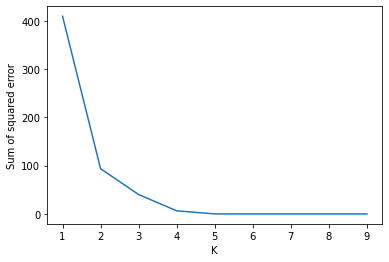

In [696]:
plt.xlabel('K') # let's see the values for the cluster which has the least SSE
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [697]:
restro_cluster.value_counts().sort_values(ascending=False) # finding total numbers of cluster for 5 clusters

clusters of restaurant
0.25                      3945
0.75                      1097
0.00                      1093
0.50                       720
1.00                       113
dtype: int64